#### Kaggle Competition : Costan Rican Household Poverty Level Prediction
https://www.kaggle.com/c/costa-rican-household-poverty-prediction

## 1. Investigate : Know data types

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1   ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
0     0   ...            100    1849               1        100             0   
1     0   ...            144    4489               1        144             0   
2     0   ...            121    8464               1          0             0   
3     0   ...             81     289              16        121             4   
4     0   ...            121    1369              16        121             4   

   SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
0         1.000000            0.0      100.0   1849       4  
1         1.000000           64.0      144.0   4489       4  
2         0.250000           64.0      121.0   8464       4  
3         1.777778            1.0      121.0    289       4  
4         1.777778            1.0      121.0   1369       4  

[5 rows x 143 columns]

In [3]:
code=pd.read_csv('codebook.csv')
code.columns=['name','desc']
code.head()

name                               desc
0    v2a1               Monthly rent payment
1  hacdor        =1 Overcrowding by bedrooms
2   rooms   number of all rooms in the house
3  hacapo           =1 Overcrowding by rooms
4    v14a     =1 has toilet in the household

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


Text(0.5, 1.0, 'count of unique values in integer columns')

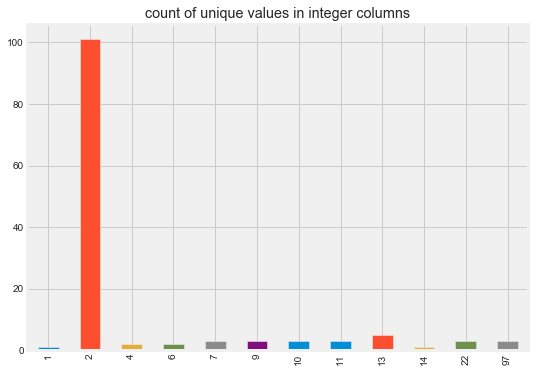

In [5]:
#Integer columns
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(figsize=(8,6))
plt.title('count of unique values in integer columns')

means binary columns are more than 100

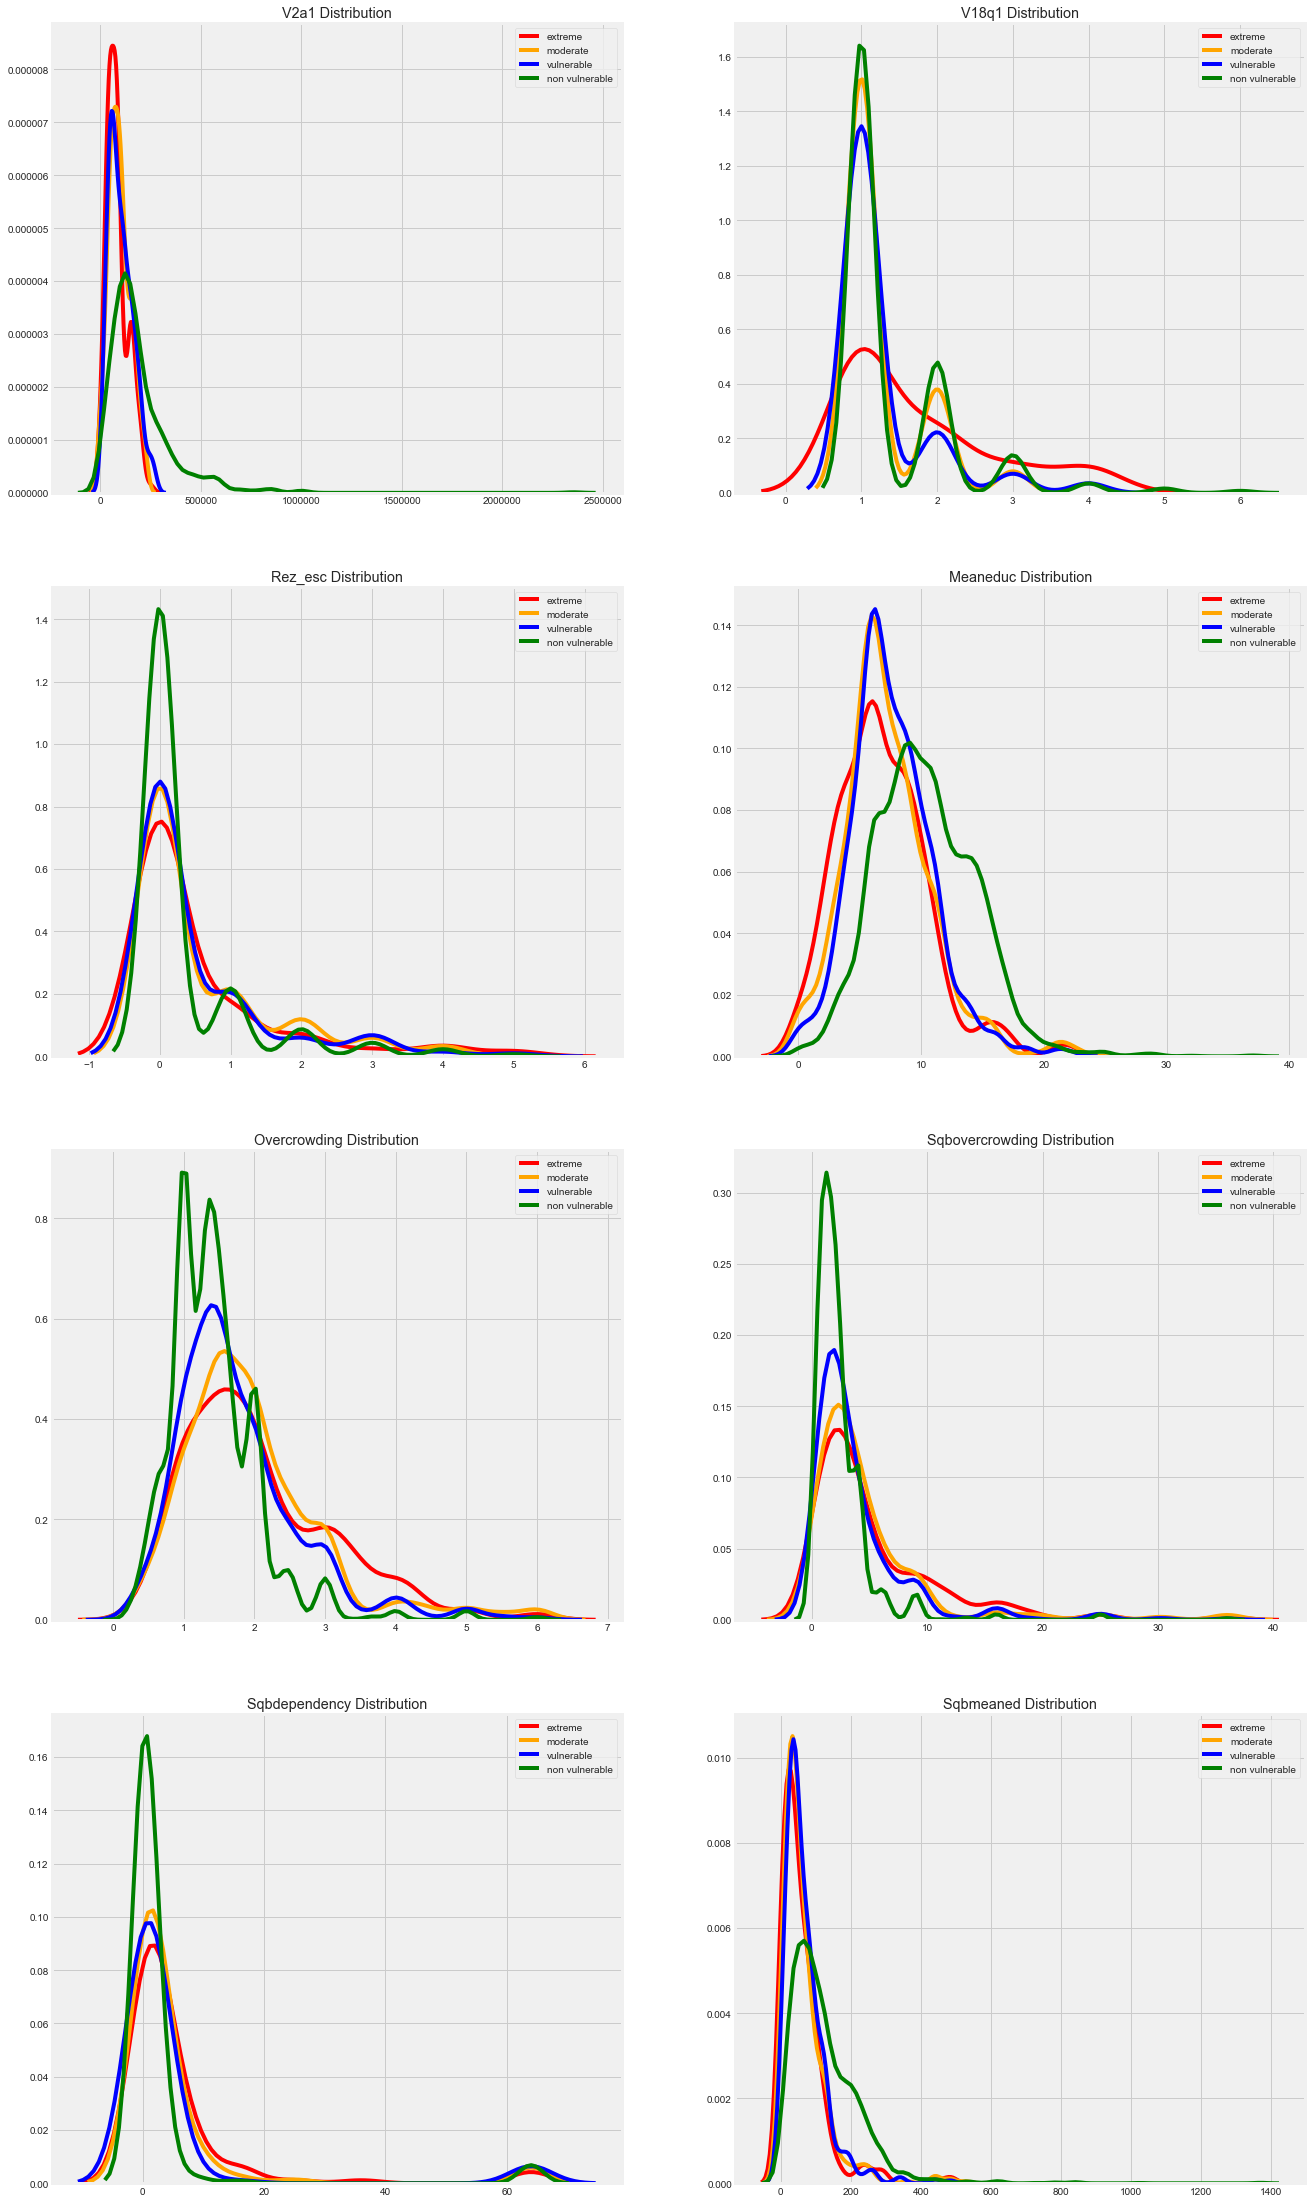

In [8]:
#8 float columns
from collections import OrderedDict

plt.figure(figsize=(20,16))
colors = OrderedDict({1:'red',2:'orange',3:'blue',4:'green'})
poverty = OrderedDict({1:'extreme',2:'moderate',3:'vulnerable',4:'non vulnerable'})

for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4,2,i+1)
    for pov, color in colors.items():
        sns.kdeplot(train.loc[train['Target']==pov,col].dropna(),
                   ax=ax, color=color, label=poverty[pov])
    plt.title(f'{col.capitalize()} Distribution')

plt.subplots_adjust(top=2)

In [9]:
train.select_dtypes('object').head()

Id    idhogar dependency edjefe edjefa
0  ID_279628684  21eb7fcc1         no     10     no
1  ID_f29eb3ddd  0e5d7a658          8     12     no
2  ID_68de51c94  2c7317ea8          8     no     11
3  ID_d671db89c  2b58d945f        yes     11     no
4  ID_d56d6f5f5  2b58d945f        yes     11     no

## 2. EDA

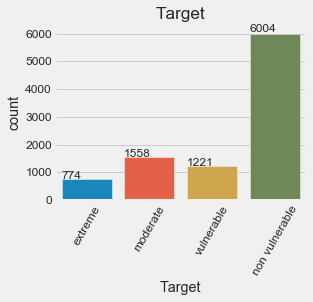

In [337]:
fig= plt.subplots(figsize=(4,3))
ax = sns.countplot('Target', data=train)
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x(),p.get_height()*1.01))
ax.set_title('Target')
plt.xticks([x-1 for x in poverty.keys()], list(poverty.values()),rotation=60)
plt.show()

<Figure size 432x288 with 0 Axes>

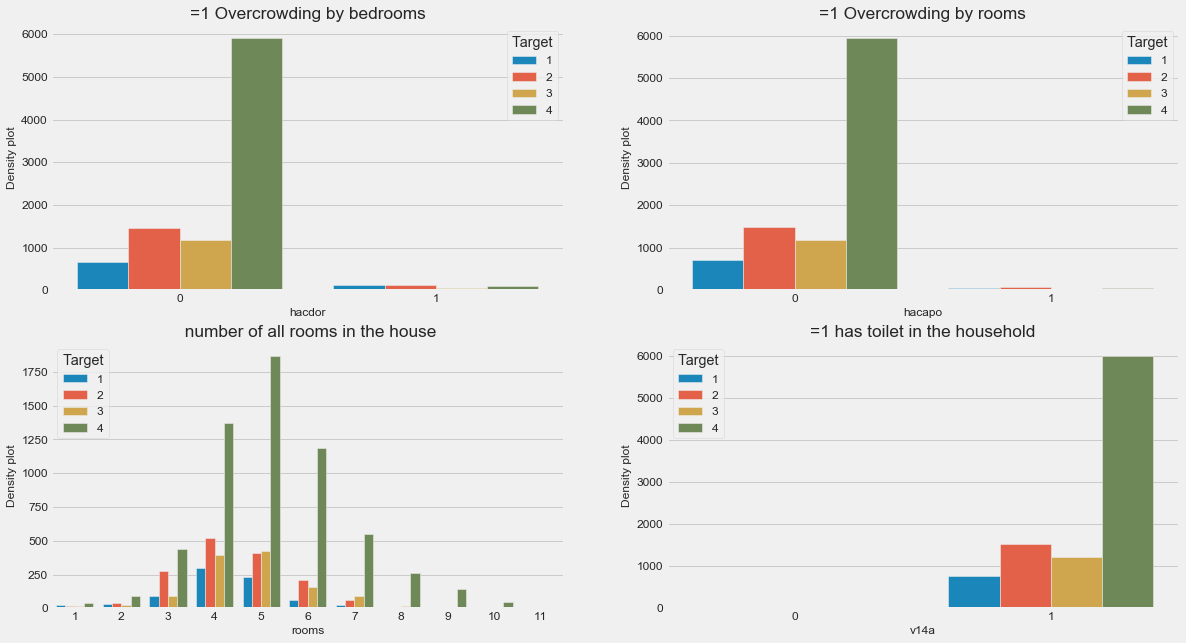

In [338]:
import numpy as np
var = ['hacdor','hacapo','rooms','v14a']

plt.figure()
fig, axs = plt.subplots(2,2,figsize=(18,10))
i=0
for feature in var:
    i+=1
    plt.subplot(2,2,i)
    sns.countplot(feature,hue='Target', data=train)
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [339]:
len(train.loc[(train['v14a']==0) & (train['Target']==4)]) #0인부분이 없는건 아닌듯 하다

10

<Figure size 432x288 with 0 Axes>

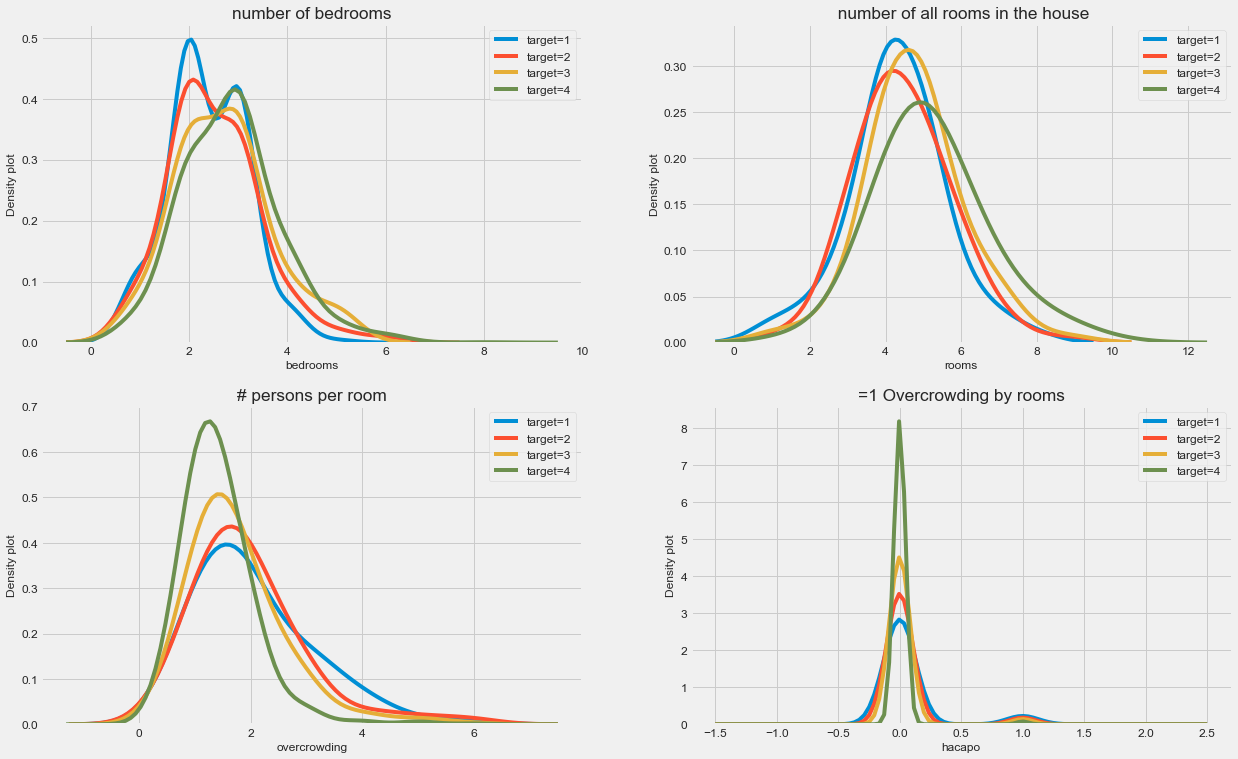

In [340]:
var = ['bedrooms','rooms','overcrowding','hacapo']
t1= train.loc[train['Target']==1]
t2=train.loc[train['Target']==2]
t3=train.loc[train['Target']==3]
t4=train.loc[train['Target']==4]

plt.figure()
fig, axs = plt.subplots(2,2,figsize=(19,12))
i=0
for feature in var:
    i+=1
    plt.subplot(2,2,i)
    sns.kdeplot(t1[feature], bw=.5, label="target=1")
    sns.kdeplot(t2[feature], bw=.5, label="target=2") #bandwidth가중요
    sns.kdeplot(t3[feature], bw=.5, label="target=3")
    sns.kdeplot(t4[feature], bw=.5, label="target=4") #bandwidth가중요
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

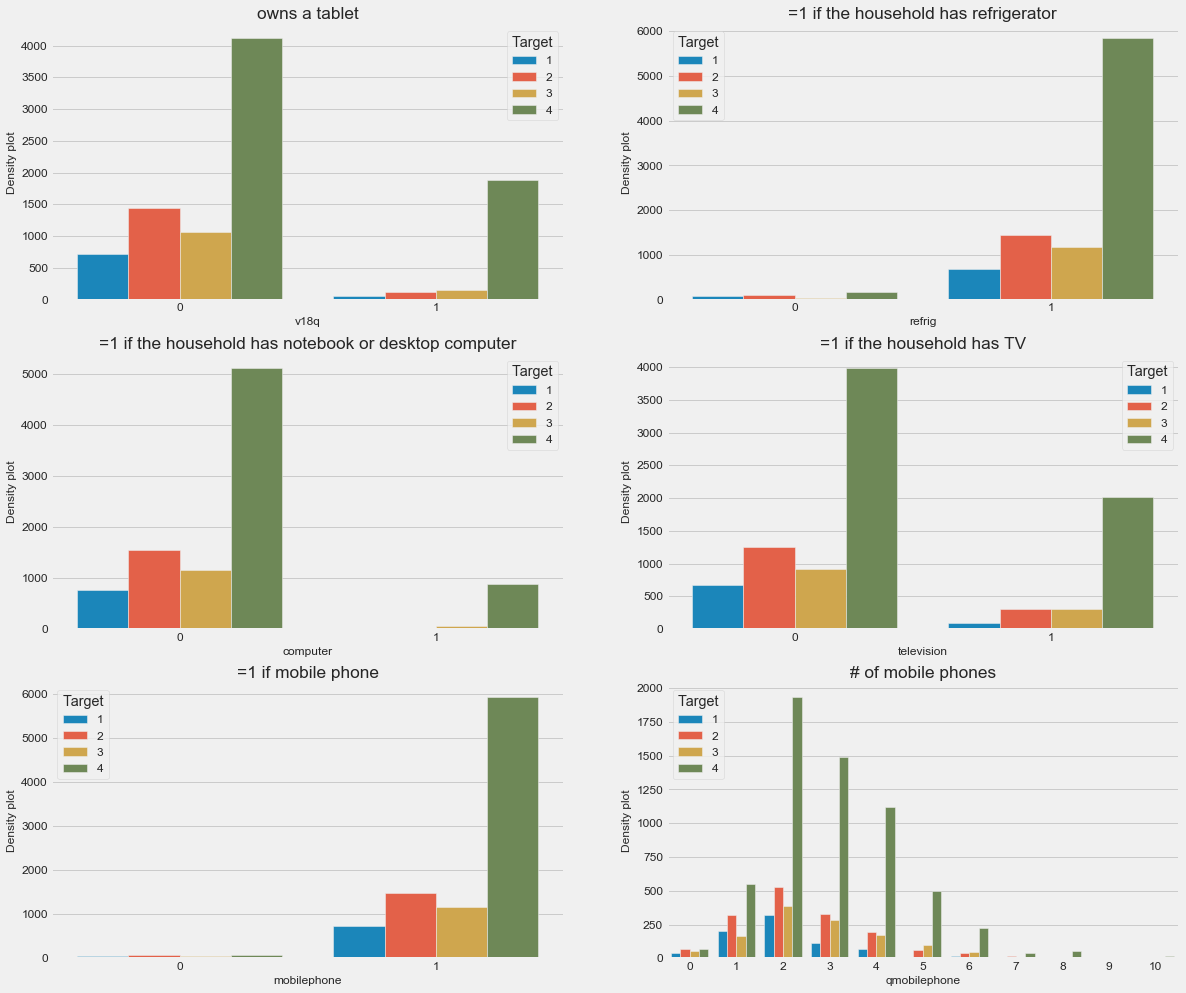

In [341]:
#tech things
var = ['v18q','refrig','computer','television','mobilephone','qmobilephone']

plt.figure()
fig, axs = plt.subplots(3,2,figsize=(18,16))
i=0
for feature in var:
    i+=1
    plt.subplot(3,2,i)
    sns.countplot(feature,hue='Target', data=train)
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

tv랑 computer가 없다에 target4가 많이 포함된것도 신기 - 비율로 봤을때 4 target 동등한듯

In [342]:
print(len(train.loc[(train['computer']==1) & (train['Target']==1)]))
print(len(train.loc[(train['computer']==1) & (train['Target']==2)]))

13
20


<Figure size 432x288 with 0 Axes>

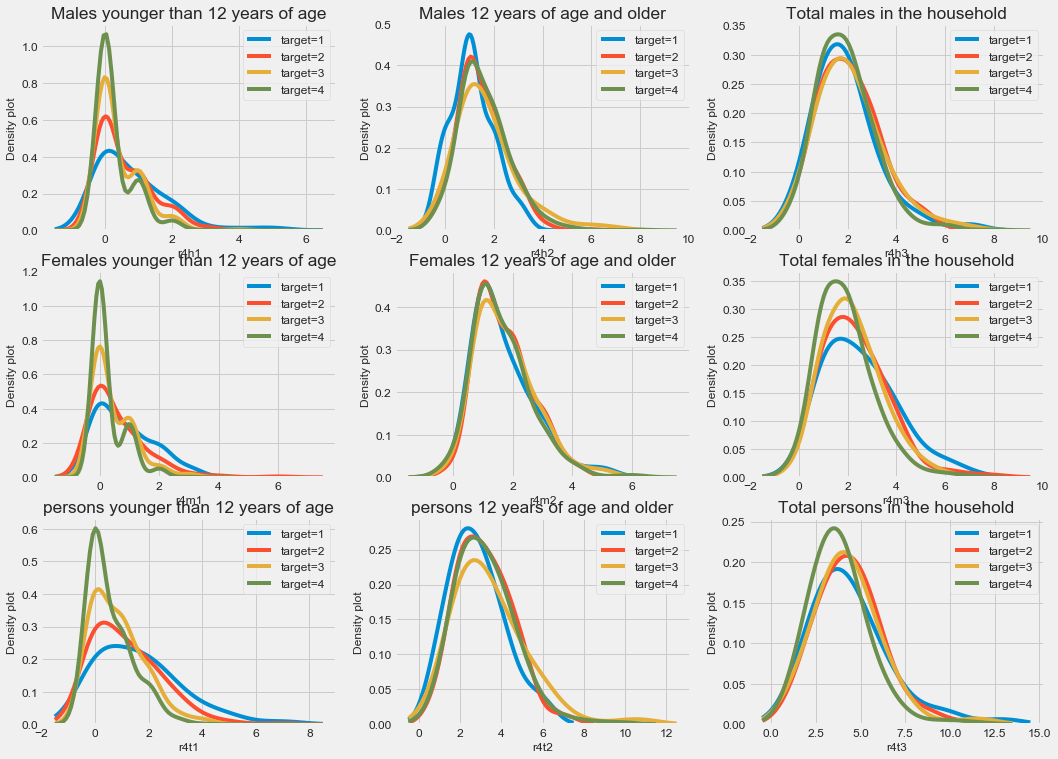

In [343]:
var = ['r4h1','r4h2','r4h3','r4m1','r4m2','r4m3','r4t1','r4t2','r4t3']
t1= train.loc[train['Target']==1]
t2=train.loc[train['Target']==2]
t3=train.loc[train['Target']==3]
t4=train.loc[train['Target']==4]

plt.figure()
fig, axs = plt.subplots(3,3,figsize=(16,12))
i=0
for feature in var:
    i+=1
    plt.subplot(3,3,i)
    sns.kdeplot(t1[feature], bw=.5, label="target=1")
    sns.kdeplot(t2[feature], bw=.5, label="target=2") #bandwidth가중요
    sns.kdeplot(t3[feature], bw=.5, label="target=3")
    sns.kdeplot(t4[feature], bw=.5, label="target=4") #bandwidth가중요
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

4->3->2->1 순으로 가족수가 적었고, 특히 아이들(12살미만) 수는 현저한 차이를 보임

<Figure size 432x288 with 0 Axes>

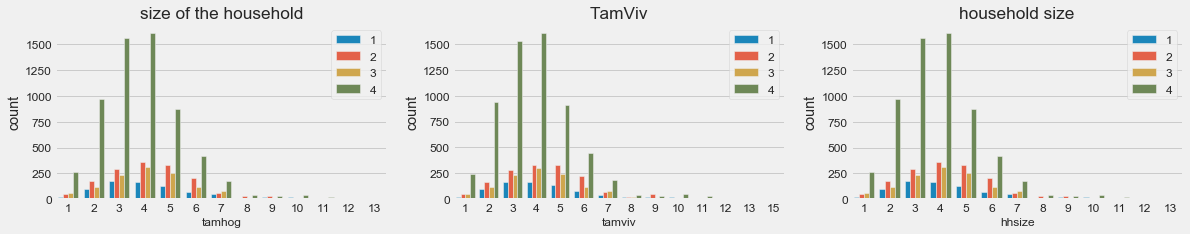

In [344]:
var = ['tamhog','tamviv','hhsize']
t1= train.loc[train['Target']==1]
t2=train.loc[train['Target']==2]
t3=train.loc[train['Target']==3]
t4=train.loc[train['Target']==4]

plt.figure()
fig, axs = plt.subplots(1,3,figsize=(18,3))
i=0
for feature in var:
    i+=1
    plt.subplot(1,3,i)
    sns.countplot(feature, data=train, hue='Target')
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel(feature, fontsize=12)
    plt.legend(loc='upper right')
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

tamhog, tamviv, hhsize 매우 비슷한 분포를 보임 (tamviv = number of persons living in the household)

<Figure size 432x288 with 0 Axes>

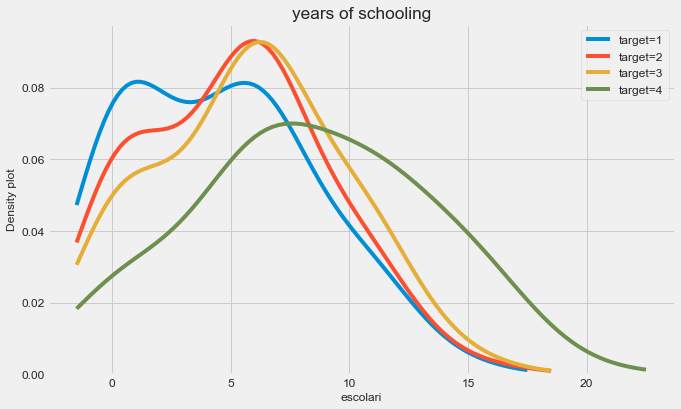

In [346]:
var = ['escolari']
t1= train.loc[train['Target']==1]
t2=train.loc[train['Target']==2]
t3=train.loc[train['Target']==3]
t4=train.loc[train['Target']==4]

plt.figure()
fig, axs = plt.subplots(1,1,figsize=(10,6))
i=0
for feature in var:
    i+=1
    plt.subplot(1,1,i)
    sns.kdeplot(t1[feature], bw=.5, label="target=1")
    sns.kdeplot(t2[feature], bw=.5, label="target=2") #bandwidth가중요
    sns.kdeplot(t3[feature], bw=.5, label="target=3")
    sns.kdeplot(t4[feature], bw=.5, label="target=4") #bandwidth가중요
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [347]:
#각 target마다 변수가 차지하는 비율
df=train[['paredblolad','paredzocalo','paredpreb','pareddes','paredmad','paredzinc','paredfibras','paredother','Target']].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(8):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df2

paredblolad  paredzocalo  paredpreb  pareddes  paredmad  paredzinc  \
0     0.391473     0.107235   0.251938  0.015504  0.196382   0.029716   
1     0.375481     0.115533   0.243902  0.026958  0.210526   0.022465   
2     0.515971     0.095823   0.234234  0.008190  0.142506   0.003276   
3     0.692705     0.060460   0.155896  0.002998  0.075117   0.010493   

   paredfibras  paredother  
0     0.007752    0.000000  
1     0.001926    0.003209  
2     0.000000    0.000000  
3     0.000833    0.001499

In [348]:
df=pd.concat([df2,df['Target']],axis=1)
df

paredblolad  paredzocalo  paredpreb  pareddes  paredmad  paredzinc  \
0     0.391473     0.107235   0.251938  0.015504  0.196382   0.029716   
1     0.375481     0.115533   0.243902  0.026958  0.210526   0.022465   
2     0.515971     0.095823   0.234234  0.008190  0.142506   0.003276   
3     0.692705     0.060460   0.155896  0.002998  0.075117   0.010493   

   paredfibras  paredother  Target  
0     0.007752    0.000000       1  
1     0.001926    0.003209       2  
2     0.000000    0.000000       3  
3     0.000833    0.001499       4

<Figure size 432x288 with 0 Axes>

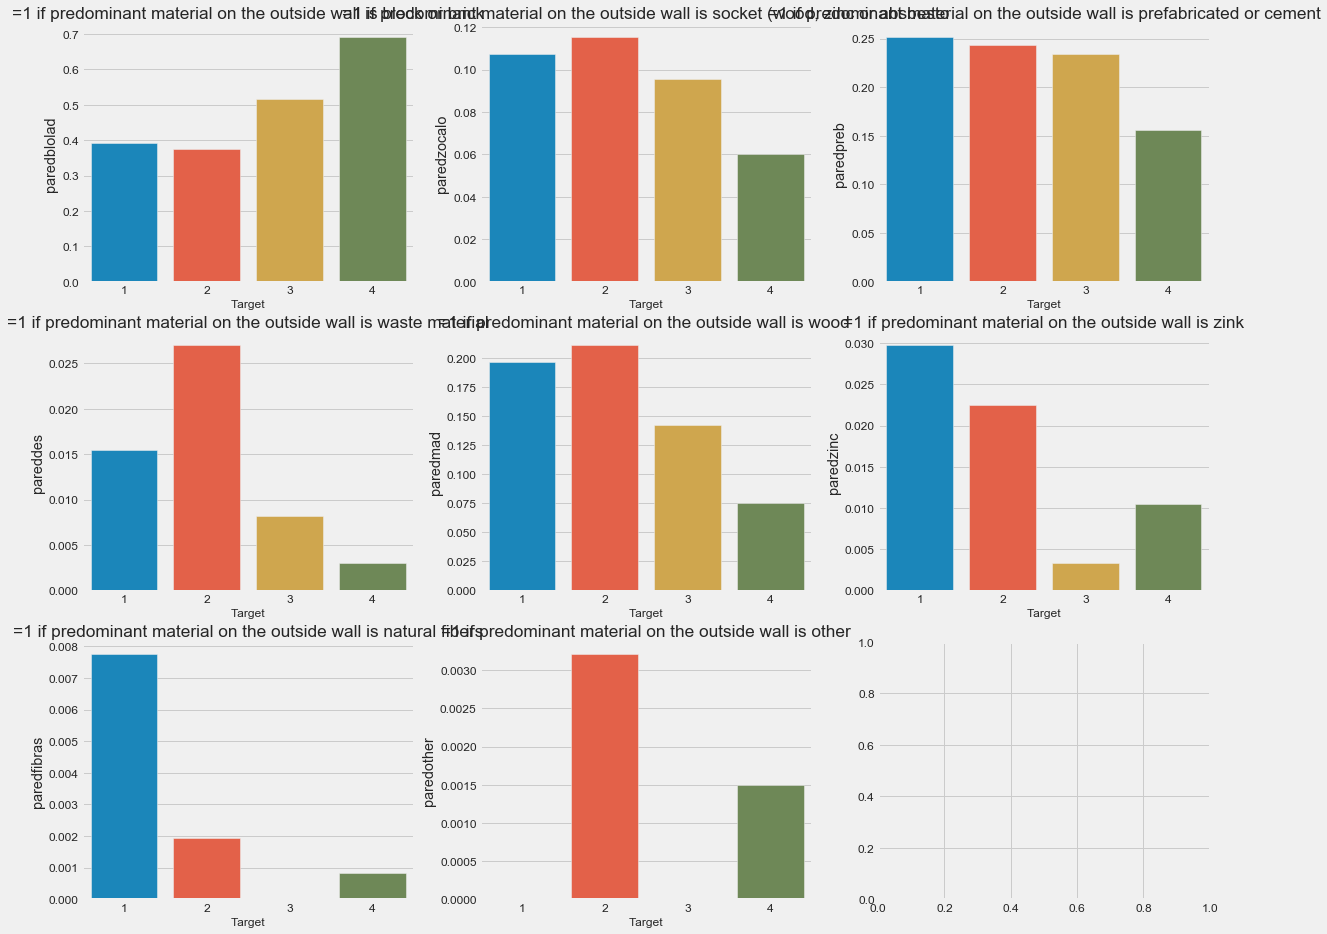

In [349]:
var = ['paredblolad','paredzocalo','paredpreb','pareddes','paredmad','paredzinc','paredfibras','paredother']

plt.figure()
fig, axs = plt.subplots(3,3,figsize=(18,15))
i=0
for feature in var:
    i+=1
    plt.subplot(3,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

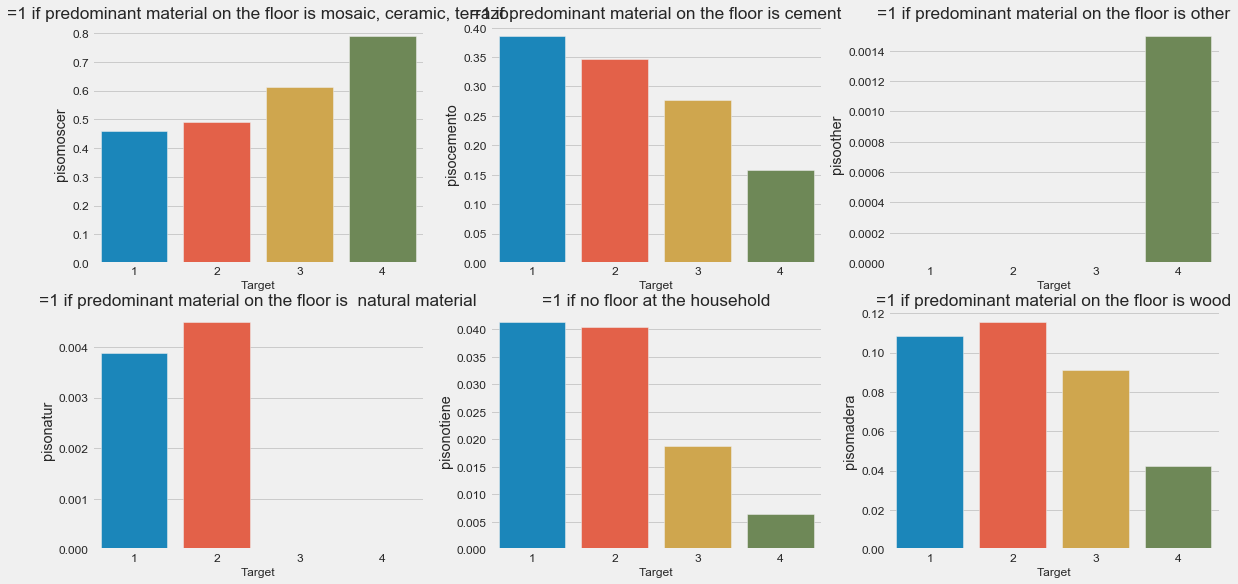

In [350]:
var = ['pisomoscer','pisocemento','pisoother','pisonatur','pisonotiene','pisomadera','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(6):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(2,3,figsize=(18,9))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(2,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

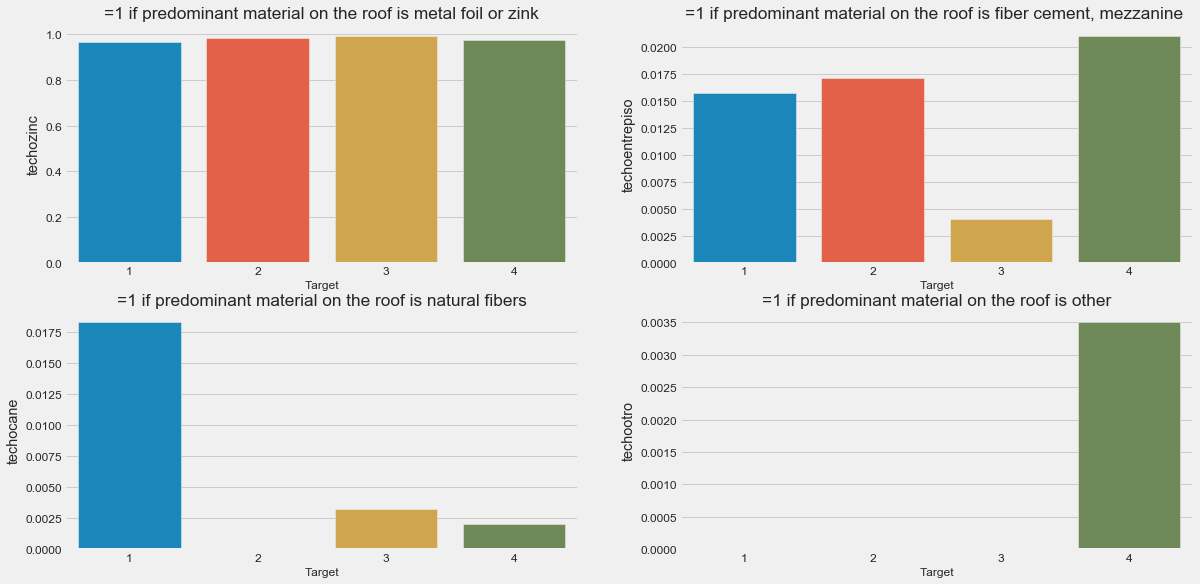

In [351]:
var = ['techozinc','techoentrepiso','techocane','techootro','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(4):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(2,2,figsize=(18,9))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(2,2,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

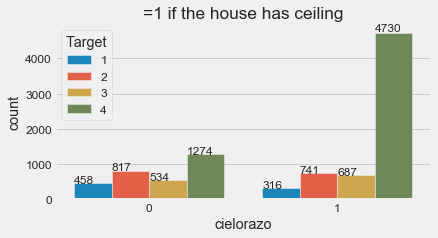

In [352]:
fig= plt.subplots(figsize=(6,3))
ax = sns.countplot('cielorazo', data=train,hue='Target')
for p in ax.patches:
    if np.isnan(float(p.get_height())):
        ax.annotate(0,(p.get_x(),0))
    else:
        ax.annotate(int(p.get_height()),(p.get_x(),p.get_height()*1.01))
ax.set_title('=1 if the house has ceiling')
plt.show()

<Figure size 432x288 with 0 Axes>

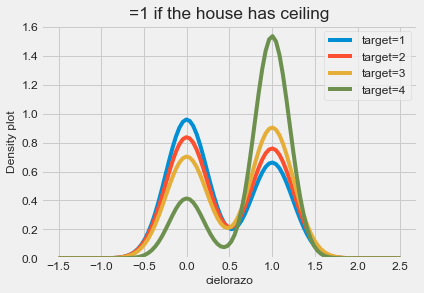

In [353]:
var = ['cielorazo']
t1= train.loc[train['Target']==1]
t2=train.loc[train['Target']==2]
t3=train.loc[train['Target']==3]
t4=train.loc[train['Target']==4]

plt.figure()
fig, axs = plt.subplots(1,1,figsize=(6,4))
i=0
for feature in var:
    i+=1
    plt.subplot(1,1,i)
    sns.kdeplot(t1[feature], bw=.5, label="target=1")
    sns.kdeplot(t2[feature], bw=.5, label="target=2") #bandwidth가중요
    sns.kdeplot(t3[feature], bw=.5, label="target=3")
    sns.kdeplot(t4[feature], bw=.5, label="target=4") #bandwidth가중요
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

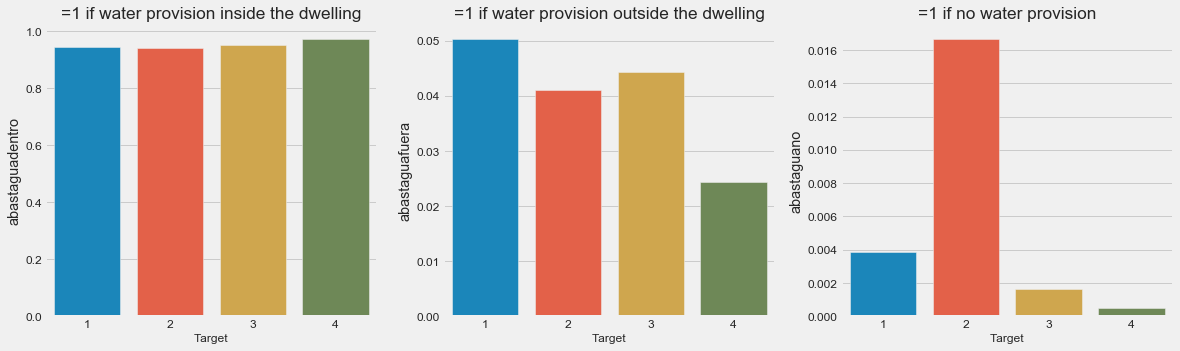

In [354]:
var = ['abastaguadentro','abastaguafuera','abastaguano','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(3):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(1,3,figsize=(18,5))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(1,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

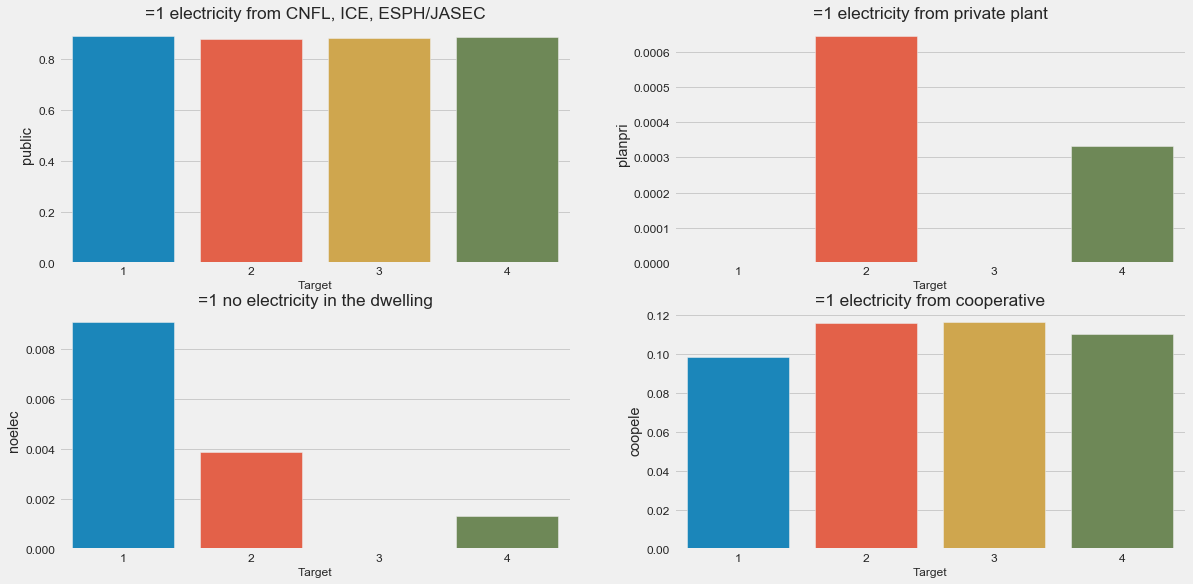

In [355]:
var = ['public','planpri','noelec','coopele','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(4):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(2,2,figsize=(18,9))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(2,2,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

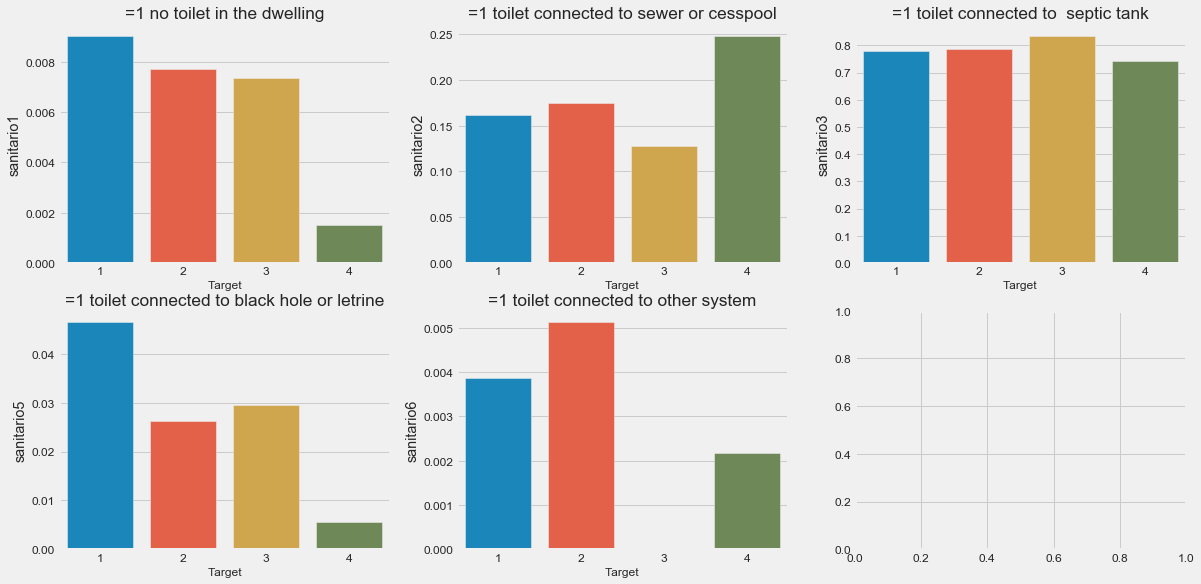

In [356]:
var = ['sanitario1','sanitario2','sanitario3','sanitario5','sanitario6','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(5):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(2,3,figsize=(18,9))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(2,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

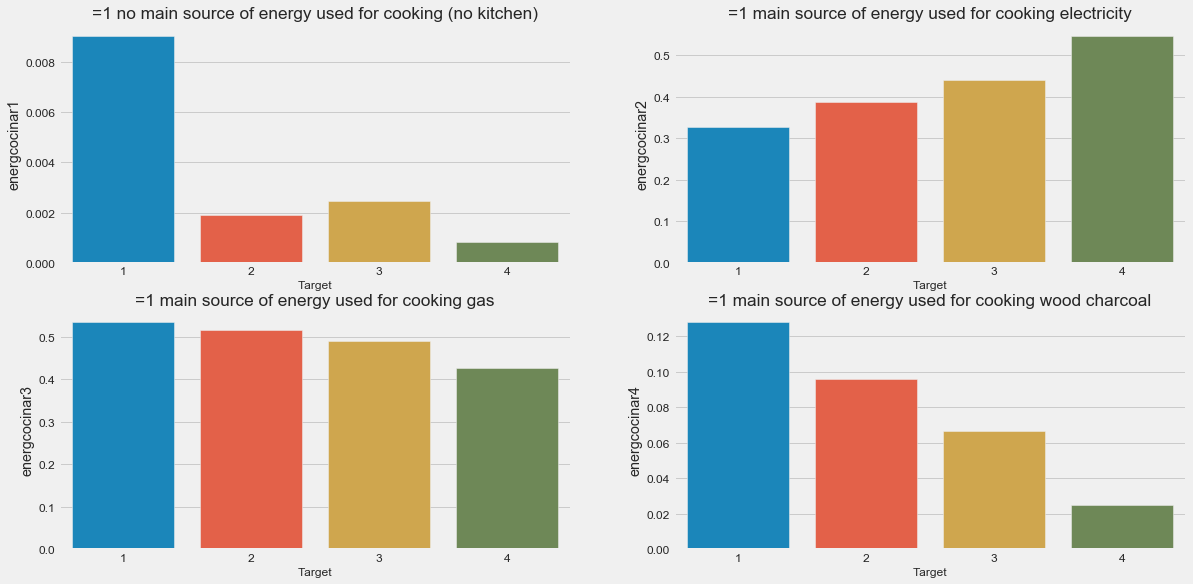

In [357]:
var = ['energcocinar1','energcocinar2','energcocinar3','energcocinar4','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(4):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(2,2,figsize=(18,9))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(2,2,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

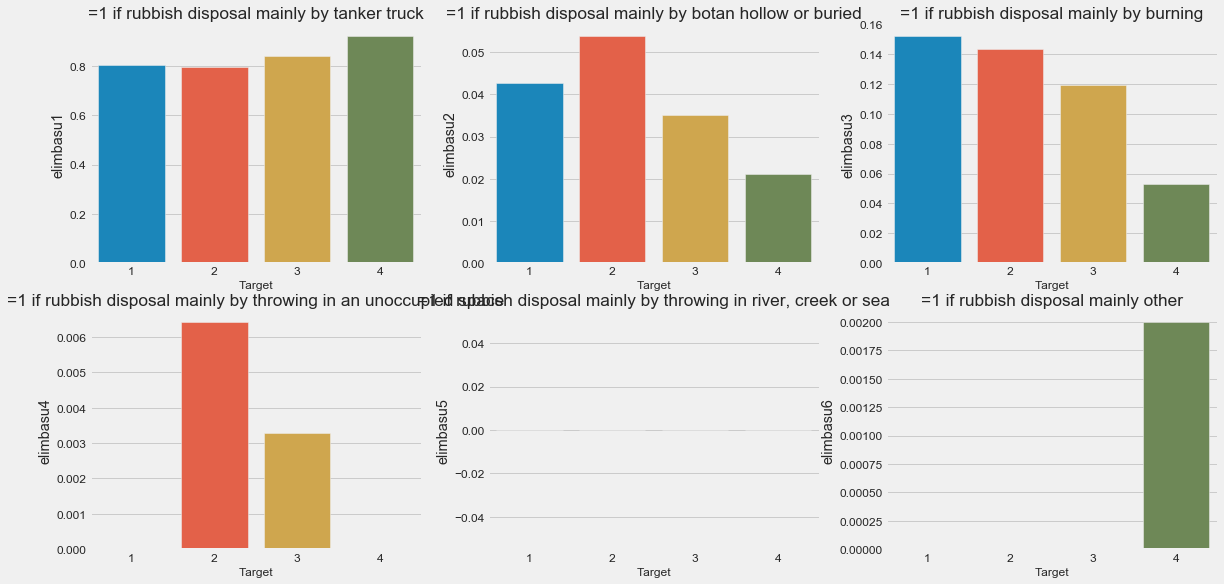

In [358]:
var = ['elimbasu1','elimbasu2','elimbasu3','elimbasu4','elimbasu5','elimbasu6','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(6):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(2,3,figsize=(18,9))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(2,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

In [359]:
train.elimbasu5.unique() #버려도될듯

array([0], dtype=int64)

<Figure size 432x288 with 0 Axes>

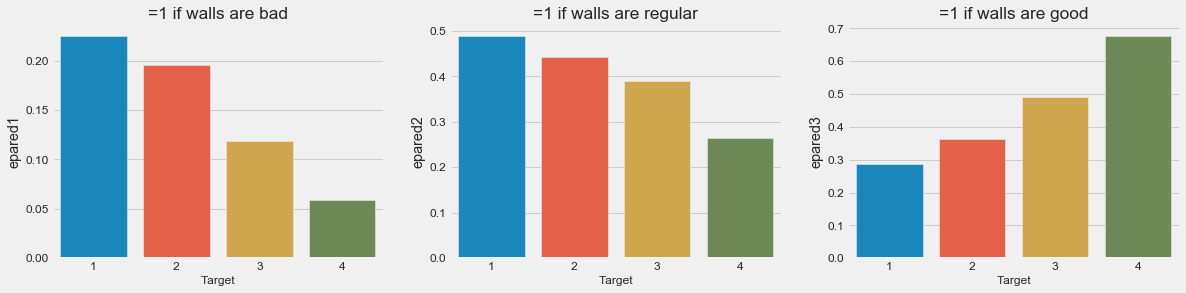

In [360]:
var = ['epared1','epared2','epared3','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(3):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(1,3,figsize=(18,4))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(1,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

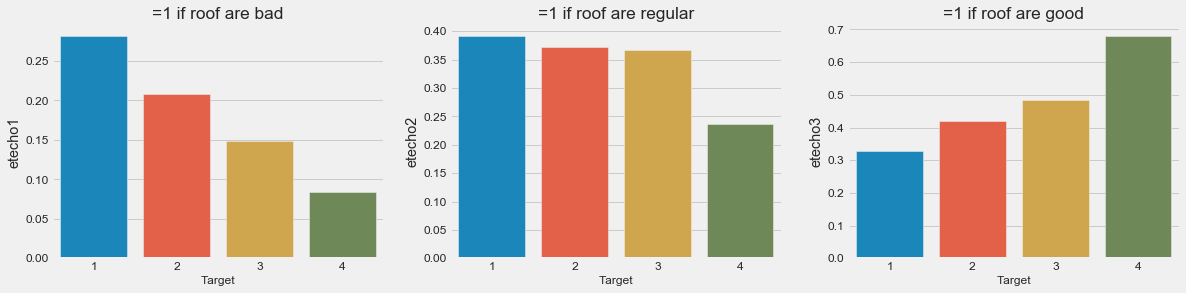

In [361]:
var = ['etecho1','etecho2','etecho3','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(3):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(1,3,figsize=(18,4))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(1,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

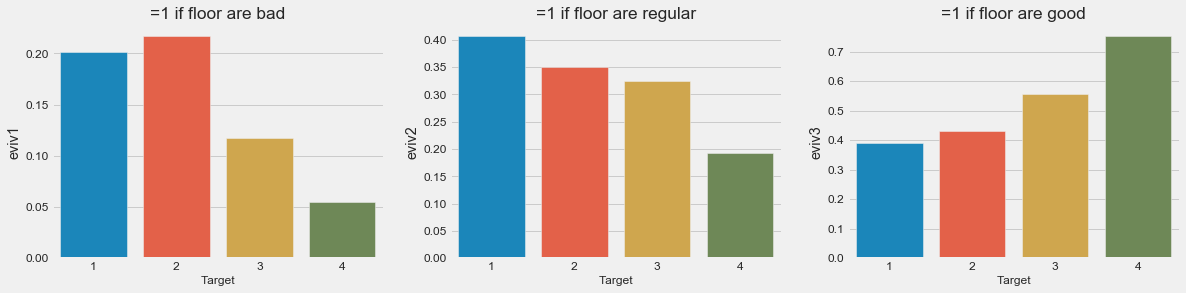

In [362]:
var = ['eviv1','eviv2','eviv3','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(3):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(1,3,figsize=(18,4))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(1,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

위 3아이템 : 확실한 상관관계을 보여준다 - 합쳐서 더 확실한 상관관계 보여줘도 될듯  
(bad=1,reg=2,good=3)

<Figure size 432x288 with 0 Axes>

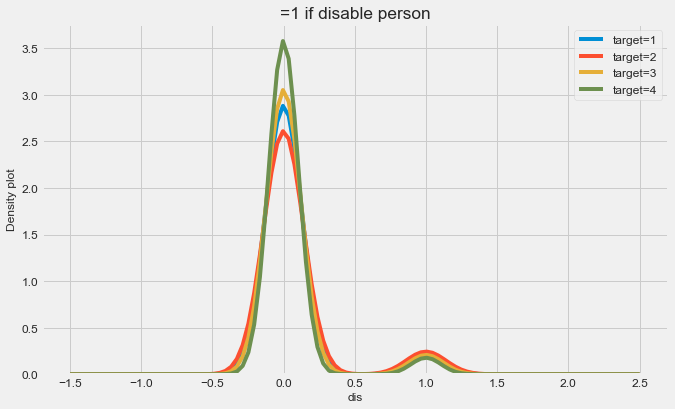

In [363]:
var = ['dis']
t1= train.loc[train['Target']==1]
t2=train.loc[train['Target']==2]
t3=train.loc[train['Target']==3]
t4=train.loc[train['Target']==4]

plt.figure()
fig, axs = plt.subplots(1,1,figsize=(10,6))
i=0
for feature in var:
    i+=1
    plt.subplot(1,1,i)
    sns.kdeplot(t1[feature], bw=.5, label="target=1")
    sns.kdeplot(t2[feature], bw=.5, label="target=2") #bandwidth가중요
    sns.kdeplot(t3[feature], bw=.5, label="target=3")
    sns.kdeplot(t4[feature], bw=.5, label="target=4") #bandwidth가중요
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

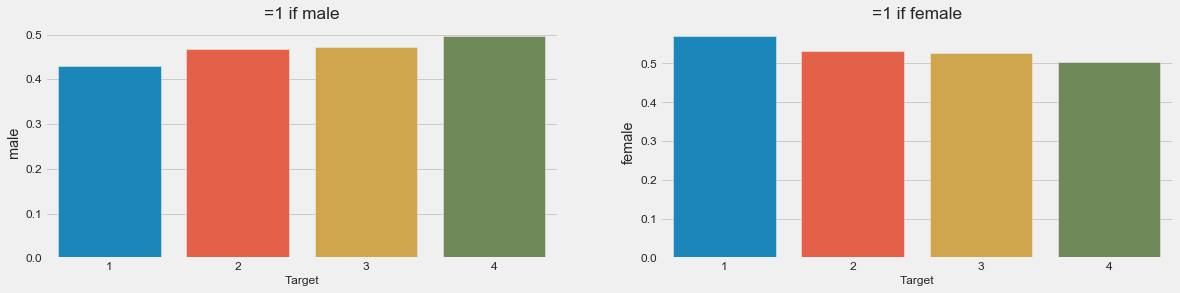

In [364]:
#완전히 seperate되는 아이템이면 이걸 쓴다
var = ['male','female','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(2):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(1,2,figsize=(18,4))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(1,2,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

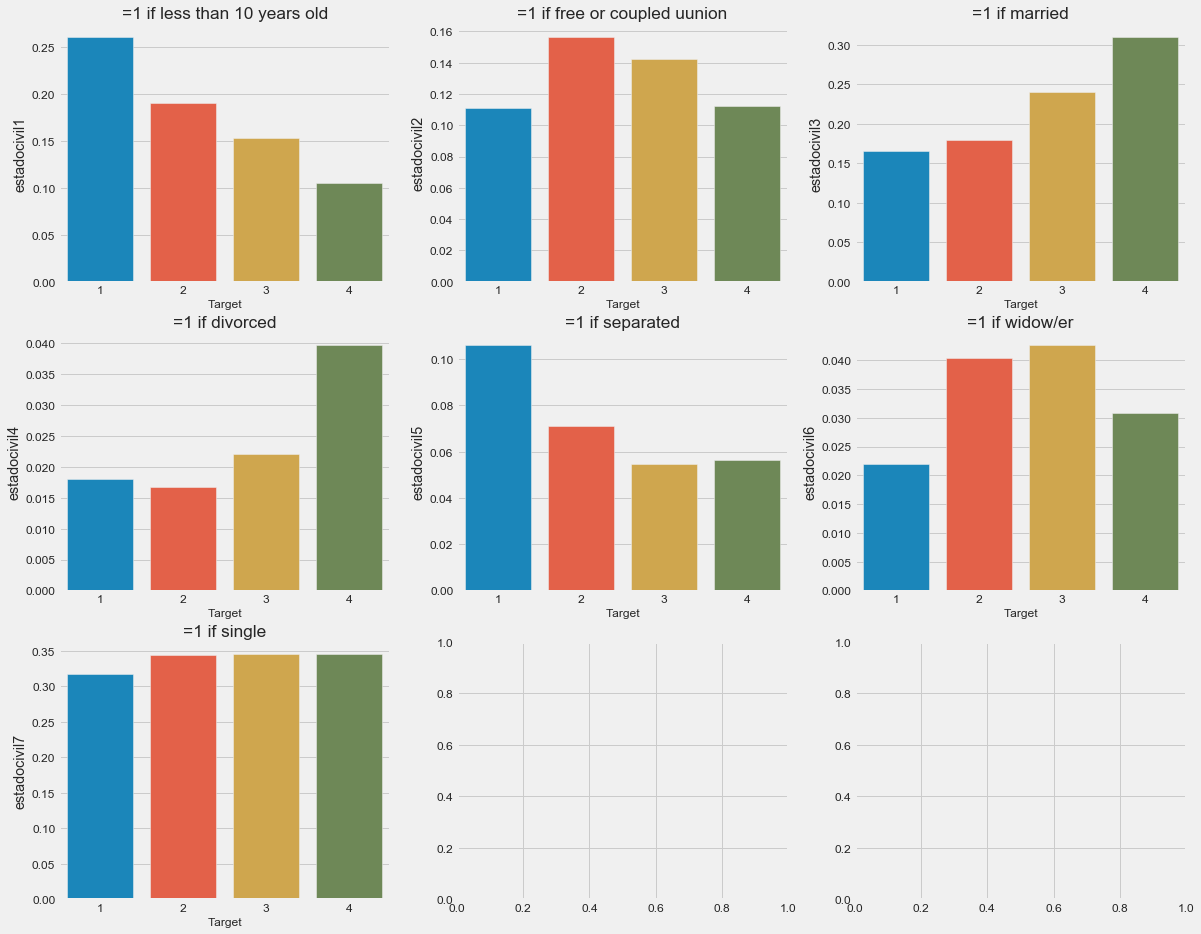

In [365]:
var = ['estadocivil1','estadocivil2','estadocivil3','estadocivil4','estadocivil5','estadocivil6','estadocivil7','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(7):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(3,3,figsize=(18,15))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(3,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

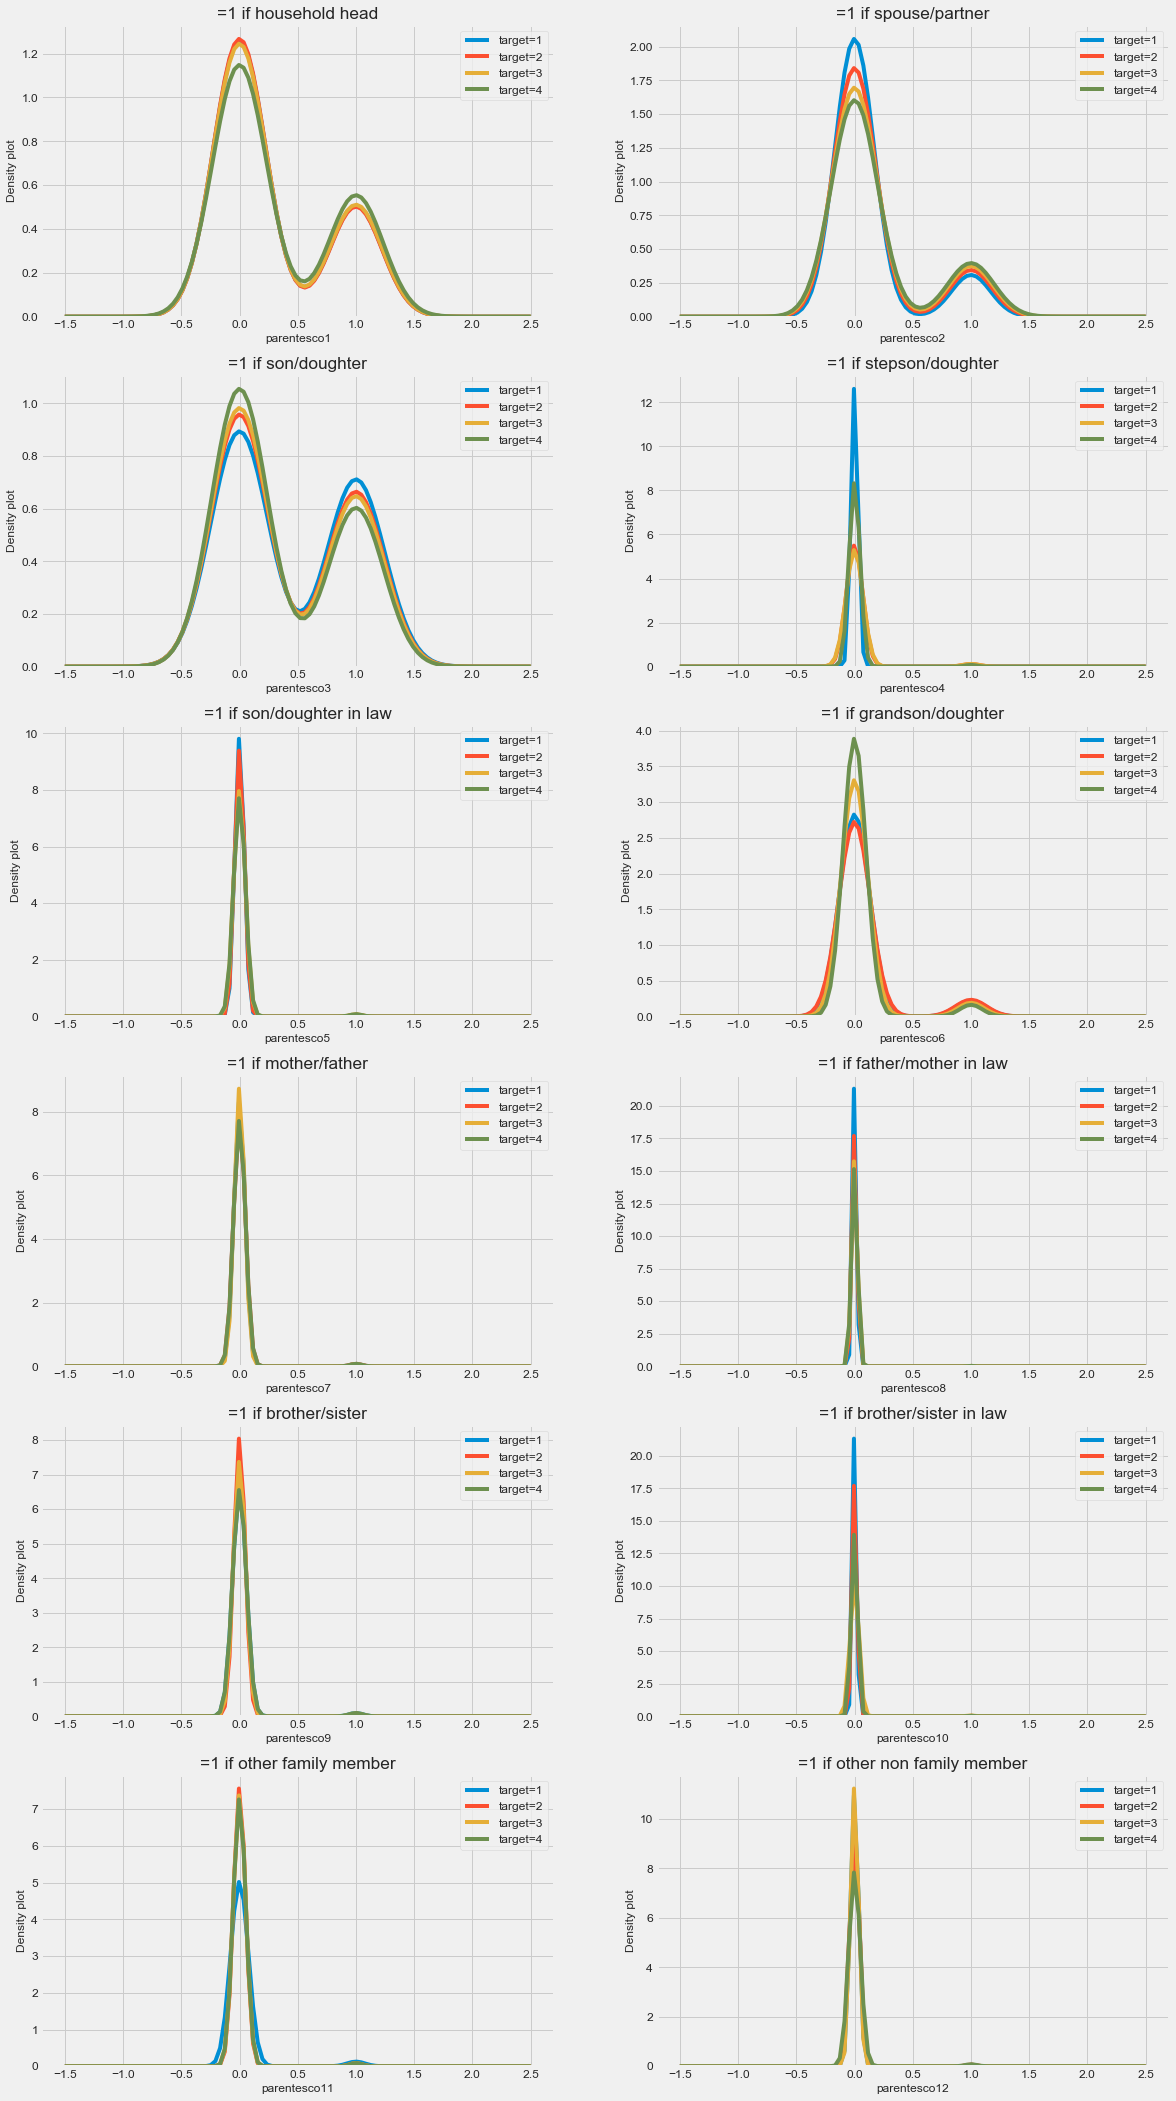

In [366]:
var = ['parentesco1','parentesco2','parentesco3','parentesco4',
       'parentesco5','parentesco6','parentesco7','parentesco8','parentesco9','parentesco10','parentesco11','parentesco12']
t1= train.loc[train['Target']==1]
t2=train.loc[train['Target']==2]
t3=train.loc[train['Target']==3]
t4=train.loc[train['Target']==4]

plt.figure()
fig, axs = plt.subplots(6,2,figsize=(18,35))
i=0
for feature in var:
    i+=1
    plt.subplot(6,2,i)
    sns.kdeplot(t1[feature], bw=.5, label="target=1")
    sns.kdeplot(t2[feature], bw=.5, label="target=2") #bandwidth가중요
    sns.kdeplot(t3[feature], bw=.5, label="target=3")
    sns.kdeplot(t4[feature], bw=.5, label="target=4") #bandwidth가중요
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

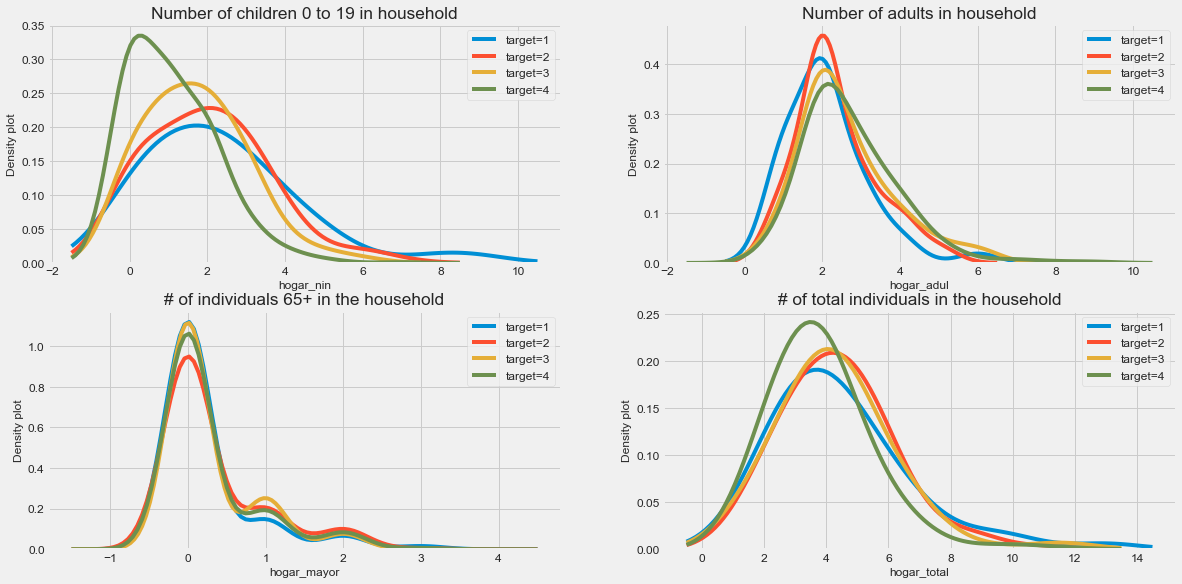

In [367]:
var = ['hogar_nin','hogar_adul','hogar_mayor','hogar_total']
t1= train.loc[train['Target']==1]
t2=train.loc[train['Target']==2]
t3=train.loc[train['Target']==3]
t4=train.loc[train['Target']==4]

plt.figure()
fig, axs = plt.subplots(2,2,figsize=(18,9))
i=0
for feature in var:
    i+=1
    plt.subplot(2,2,i)
    sns.kdeplot(t1[feature], bw=.5, label="target=1")
    sns.kdeplot(t2[feature], bw=.5, label="target=2") #bandwidth가중요
    sns.kdeplot(t3[feature], bw=.5, label="target=3")
    sns.kdeplot(t4[feature], bw=.5, label="target=4") #bandwidth가중요
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

앞서 그렸던  
r4t1과hogar_nin이 비슷(연령대가 <12냐 <19냐 차이)  
r4t2와hogar_adul이 비슷(>12 vs >19)  
r4t3와hogar_total은 똑같

In [6]:
mapping = {'yes':1,'no':0} #dictionary로 여러개 한꺼번에 replace

train['dependency'] = train['dependency'].replace(mapping).astype(np.float64)
train['edjefa'] = train['edjefa'].replace(mapping).astype(np.float64)
train['edjefe'] = train['edjefe'].replace(mapping).astype(np.float64)
test['dependency'] = test['dependency'].replace(mapping).astype(np.float64)
test['edjefa'] = test['edjefa'].replace(mapping).astype(np.float64)
test['edjefe'] = test['edjefe'].replace(mapping).astype(np.float64)

train[['dependency','edjefa','edjefe']].describe()

dependency       edjefa       edjefe
count  9557.000000  9557.000000  9557.000000
mean      1.149550     2.896830     5.096788
std       1.605993     4.612056     5.246513
min       0.000000     0.000000     0.000000
25%       0.333333     0.000000     0.000000
50%       0.666667     0.000000     6.000000
75%       1.333333     6.000000     9.000000
max       8.000000    21.000000    21.000000

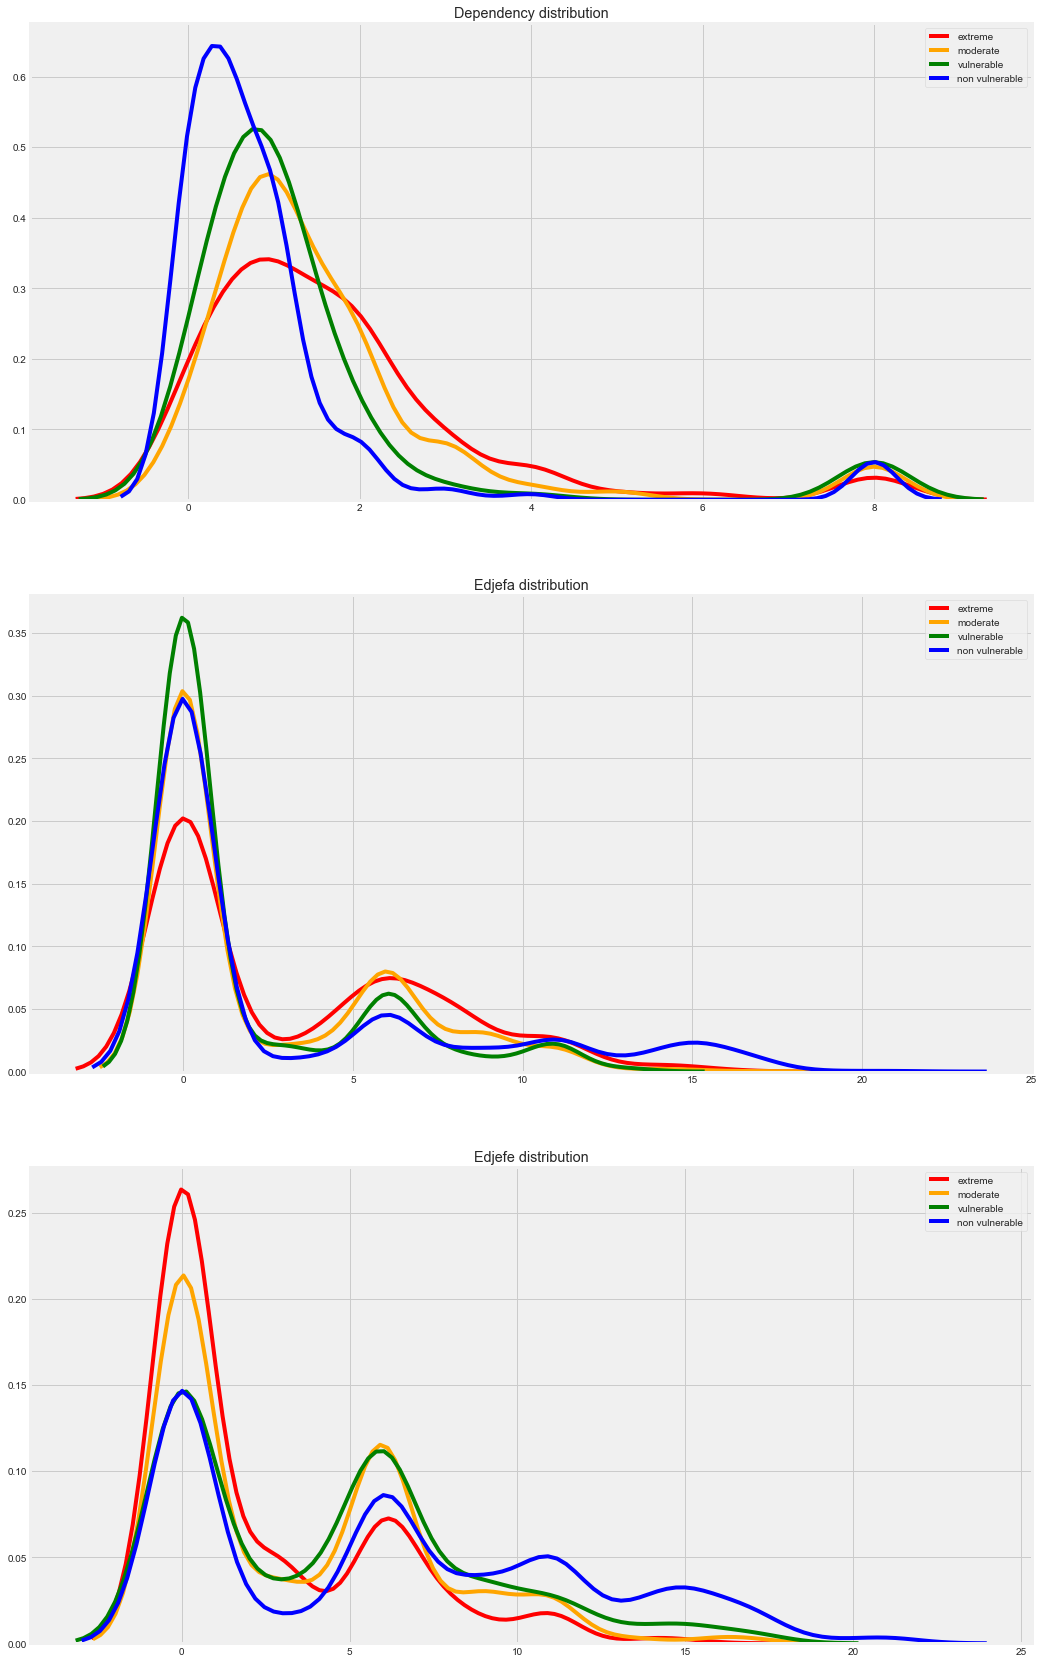

In [20]:
plt.figure(figsize=(16,12))

colors = OrderedDict({1:'red',2:'orange',3:'green',4:'blue'})
poverty = OrderedDict({1:'extreme',2:'moderate',3:'vulnerable',4:'non vulnerable'})

for i, col in enumerate(['dependency','edjefa','edjefe']):
    ax=plt.subplot(3,1,i+1)
    for pov, color in colors.items():
        sns.kdeplot(train.loc[train['Target']==pov,col].dropna(), color=color, ax=ax, 
                    label = poverty[pov])
    plt.title(f'{col.capitalize()} distribution')
plt.subplots_adjust(top=2)

education을 많이 받은 사람은 준수한 household에 살고있을 확률이 높다

<Figure size 432x288 with 0 Axes>

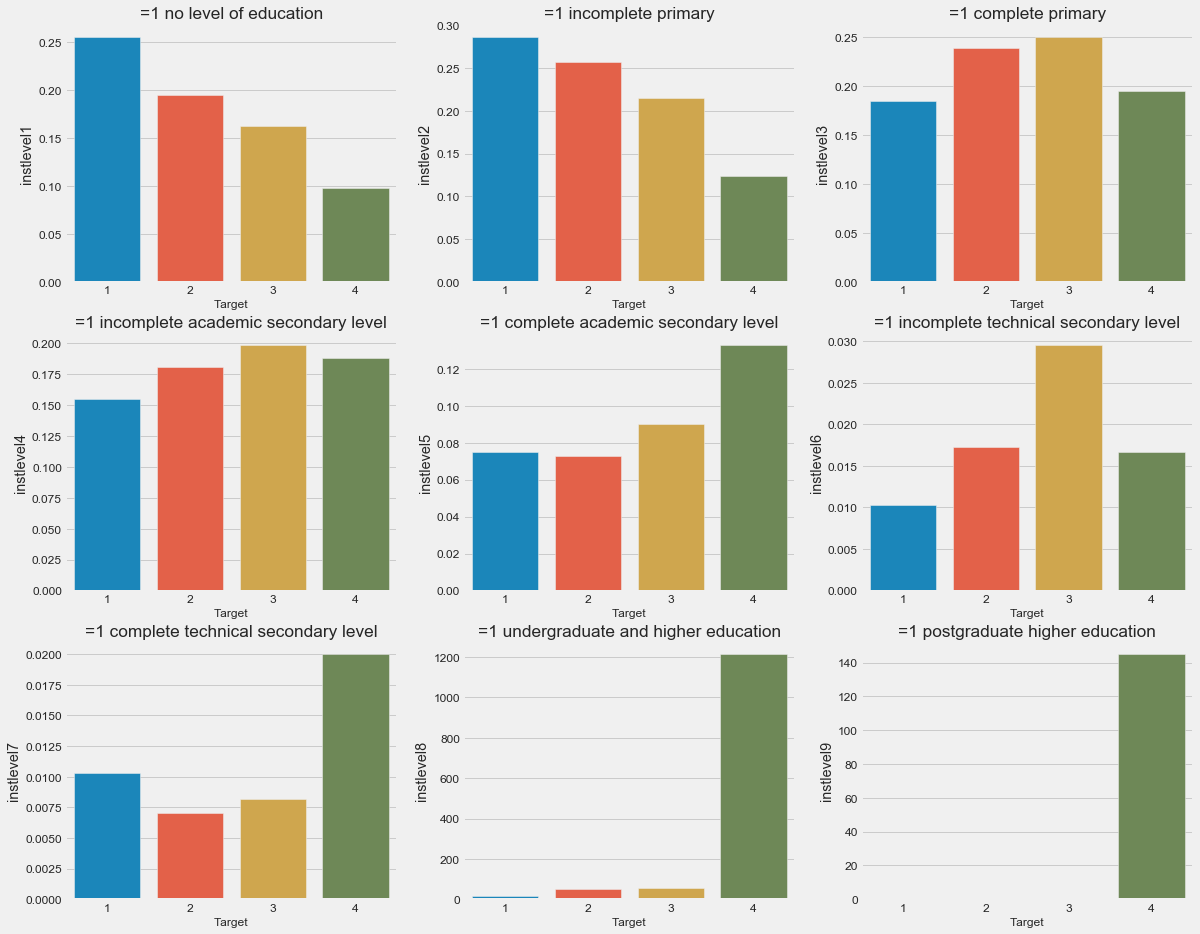

In [368]:
var = ['instlevel1','instlevel2','instlevel3','instlevel4','instlevel5','instlevel6','instlevel7','instlevel8','instlevel9','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(7):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(3,3,figsize=(18,15))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(3,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

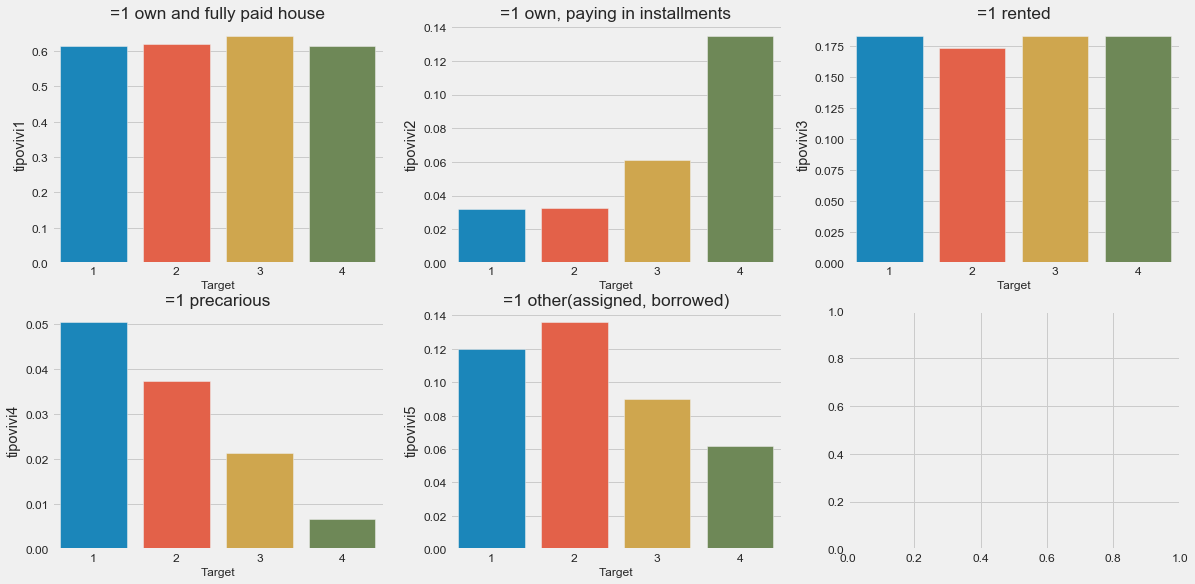

In [369]:
var = ['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(5):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(2,3,figsize=(18,9))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(2,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

precarious = 위태위태한 상황  
installments = 분할금

<Figure size 432x288 with 0 Axes>

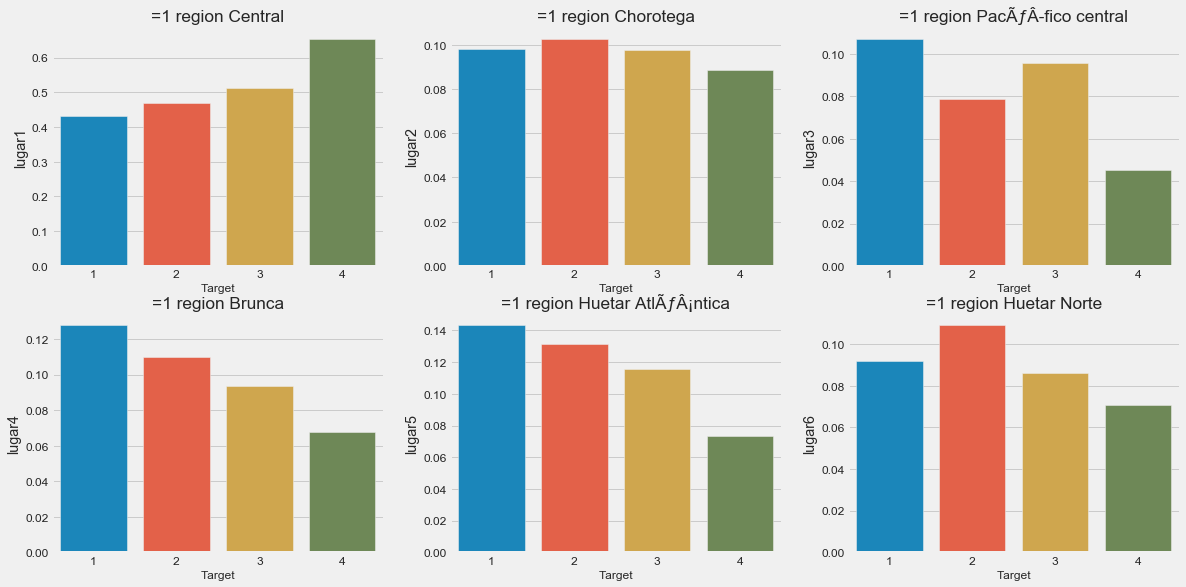

In [370]:
var = ['lugar1','lugar2','lugar3','lugar4','lugar5','lugar6','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(6):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(2,3,figsize=(18,9))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(2,3,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

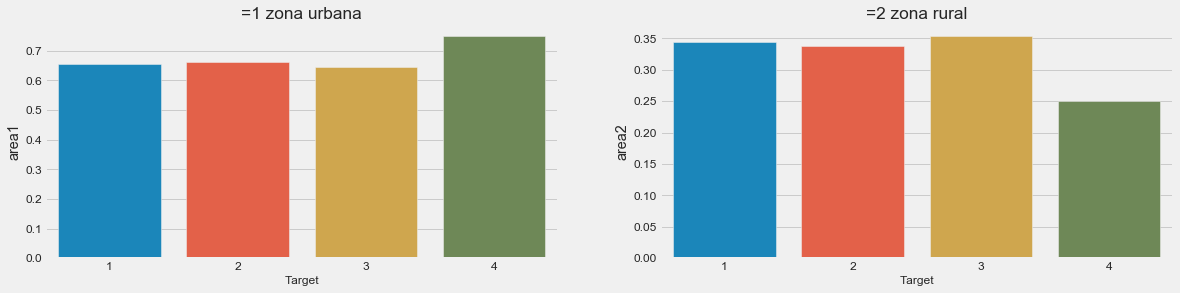

In [371]:
var = ['area1','area2','Target']

df=train[var].groupby(['Target'],as_index=False).sum()
df2=df.drop(columns=['Target'])
for i in range(4):
    s=df2.iloc[i,:].sum()
    for j in range(2):
        df2.iloc[i,j]=(df2.iloc[i,j]/s)
df=pd.concat([df2,df['Target']],axis=1)
df

plt.figure()
fig, axs = plt.subplots(1,2,figsize=(18,4))
i=0
for feature in var[:-1]:
    i+=1
    plt.subplot(1,2,i)
    sns.barplot(x='Target',y=feature,data=df)
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.xlabel('Target', fontsize=12)
plt.show()

도시쪽이 조금 더 잘 사는걸로.

<Figure size 432x288 with 0 Axes>

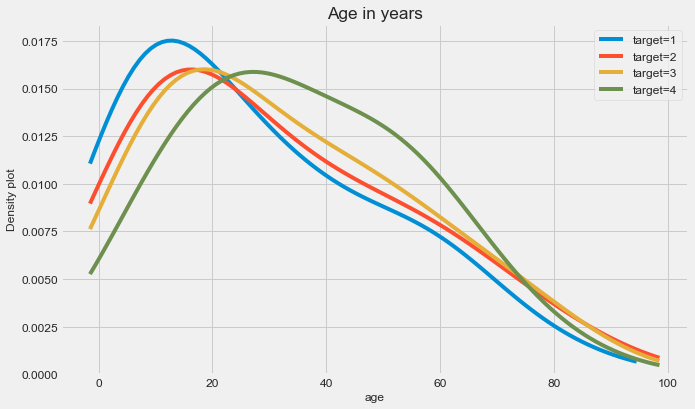

In [372]:
var = ['age']
t1= train.loc[train['Target']==1]
t2=train.loc[train['Target']==2]
t3=train.loc[train['Target']==3]
t4=train.loc[train['Target']==4]

plt.figure()
fig, axs = plt.subplots(1,1,figsize=(10,6))
i=0
for feature in var:
    i+=1
    plt.subplot(1,1,i)
    sns.kdeplot(t1[feature], bw=.5, label="target=1")
    sns.kdeplot(t2[feature], bw=.5, label="target=2") #bandwidth가중요
    sns.kdeplot(t3[feature], bw=.5, label="target=3")
    sns.kdeplot(t4[feature], bw=.5, label="target=4") #bandwidth가중요
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

나이가 많은 사람들이 좀 더 잘 사는 편

## 2. Data Processing

In [7]:
#combine train&test - 한번에 바꾸게
test['Target']=np.nan
data= train.append(test,ignore_index=True) #row로 합쳐줌(concat이랑똑같)
data

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  \
0      ID_279628684  190000.0       0      3       0     1       1     0   
1      ID_f29eb3ddd  135000.0       0      4       0     1       1     1   
2      ID_68de51c94       NaN       0      8       0     1       1     0   
3      ID_d671db89c  180000.0       0      5       0     1       1     1   
4      ID_d56d6f5f5  180000.0       0      5       0     1       1     1   
5      ID_ec05b1a7b  180000.0       0      5       0     1       1     1   
6      ID_e9e0c1100  180000.0       0      5       0     1       1     1   
7      ID_3e04e571e  130000.0       1      2       0     1       1     0   
8      ID_1284f8aad  130000.0       1      2       0     1       1     0   
9      ID_51f52fdd2  130000.0       1      2       0     1       1     0   
10     ID_db44f5c59  130000.0       1      2       0     1       1     0   
11     ID_de822510c  100000.0       0      3       0     1       1     0   
12     ID_d94071d7c  100000.0       0      3       0     1       1     0   
13     ID_064b57869       NaN       0      4       0     1       1     1   
14     ID_5c837d8a4       NaN       0      4       0     1       1     1   
15     ID_0a39e419e   90000.0       1      2       0     1       1     0   
16     ID_4ff51f90c   90000.0       1      2       0     1       1     0   
17     ID_336c51386   90000.0       1      2       0     1       1     0   
18     ID_c51938edf   90000.0       1      2       0     1       1     0   
19     ID_35b66f7c6  215000.0       0      4       0     1       1     0   
20     ID_74a2bc523  215000.0       0      4       0     1       1     0   
21     ID_15d393ce7  150000.0       0      3       0     1       1     0   
22     ID_a0bff0ba7  150000.0       0      3       0     1       1     0   
23     ID_848b0fdf1  100000.0       1      1       1     0       1     0   
24     ID_298d857e5  100000.0       1      1       1     0       1     0   
25     ID_1d5bf8ddf  100000.0       1      1       1     0       1     0   
26     ID_e5cdba865       NaN       0      5       0     1       1     0   
27     ID_e18530139  120000.0       0      4       0     1       1     1   
28     ID_cba035c44  120000.0       0      4       0     1       1     1   
29     ID_b6c1c7e65  120000.0       0      4       0     1       1     1   
...             ...       ...     ...    ...     ...   ...     ...   ...   
33383  ID_2284afed9       NaN       0      1       0     0       0     0   
33384  ID_741c22332       NaN       0      4       0     1       1     0   
33385  ID_34b7a0917       NaN       0      4       0     1       1     0   
33386  ID_bd17c8581       NaN       0      4       0     1       1     0   
33387  ID_856299b40   46500.0       0      5       0     1       1     0   
33388  ID_a18de5e41   46500.0       0      5       0     1       1     0   
33389  ID_a65eaea22       NaN       0      3       0     1       1     0   
33390  ID_d66908d02       NaN       0      3       0     1       1     0   
33391  ID_268ee9091       NaN       0      3       0     1       1     0   
33392  ID_f58a259ed       NaN       0      4       0     0       0     0   
33393  ID_265b917e8       NaN       0      4       0     0       0     0   
33394  ID_8b85078ed       NaN       0      4       0     1       1     0   
33395  ID_2789c94fa       NaN       0      4       0     1       1     0   
33396  ID_da28a4a6b       NaN       0      4       0     1       1     0   
33397  ID_35185fb42       NaN       0      4       0     1       1     0   
33398  ID_19c0b1480       NaN       0      4       0     1       1     0   
33399  ID_898d44ca1       NaN       0      4       0     1       1     0   
33400  ID_aa256c594       NaN       0      5       0     1       1     0   
33401  ID_28371903e       NaN       0      5       0     1       1     0   
33402  ID_632c8e99e       NaN       0      5       0     1       1     0   
33403  ID_f0c9c06f7       NaN       1      2       1     1       

### Identify error in the data

In [8]:
#family members in same household but dif poverty level
all_equal = train.groupby('idhogar')['Target'].apply(lambda x:x.nunique()==1)

not_equal = all_equal[all_equal!=True]
len(not_equal)

85

In [9]:
not_equal.head()

idhogar
0172ab1d9    False
03f4e5f4d    False
0511912b6    False
078a0b6e2    False
09e25d616    False
Name: Target, dtype: bool

In [10]:
not_equal.index

Index(['0172ab1d9', '03f4e5f4d', '0511912b6', '078a0b6e2', '09e25d616',
       '0f3e65c83', '0f9494d3a', '15a891635', '17fb04a62', '18832b840',
       '26b3a0f41', '288579c97', '28893b5e7', '2c9872b82', '2cb443214',
       '309fb7246', '30a70901d', '3c6973219', '3c73c107f', '3df651058',
       '3fe29a56b', '410194c8b', '417865404', '42ec8bef5', '43b9c83e5',
       '44f219a16', '46af47063', '4b6077882', '4c2dba109', '4dc11e11f',
       '4e19bd549', '50e064ee8', '513adb616', '54118d5d9', '55a662731',
       '564eab113', '594d3eb27', '5c3f7725d', '5c6f32bbc', '5e9329fc6',
       '614b48fb7', '636330516', '654ef7612', '67ad49822', '6833ac5dc',
       '694a0cbf4', '6a389f3de', '6bcf799cf', '6c543442a', '71cd52a80',
       '73d85d05d', '7ad269eef', '7c57f8237', '7e9d58c5c', '7ea6aca15',
       '80a66379b', '811a35744', '8242a51ec', '8420bcfca', '8ae3e74ca',
       '8bb6da3c1', '932287f5d', '9bbf7c6ca', 'a20ff33ba', 'a3288e6fa',
       'a94a45642', 'bcaa2e2f5', 'bcab69521', 'bd82509d1', 'be91

In [11]:
# gonna replace targets w/ ones of parentesco1
# 에러난 household중에서 가장이 없는덴 없는지?
t=train.groupby('idhogar')['parentesco1'].sum()
t=t.loc[t==0].index
count=0
for i in not_equal.index:
    if i in t:
        count+=1 
count

0

다행히 없다

In [12]:
for household in not_equal.index:
    train.loc[train['idhogar']==household,'Target']=train.loc[(train['idhogar']==household) & (train['parentesco1']==1),'Target'].values[0]
    print(train.loc[train['idhogar']==household,'Target'])

7651    3
7652    3
7653    3
7654    3
7655    3
Name: Target, dtype: int64
7480    1
7481    1
7482    1
Name: Target, dtype: int64
2311    4
2312    4
2313    4
2314    4
Name: Target, dtype: int64
8380    1
8381    1
8382    1
8383    1
Name: Target, dtype: int64
7589    2
7590    2
7591    2
7592    2
Name: Target, dtype: int64
7345    1
7346    1
7347    1
Name: Target, dtype: int64
511    2
512    2
513    2
514    2
515    2
Name: Target, dtype: int64
5509    1
5510    1
5511    1
Name: Target, dtype: int64
6548    2
6549    2
6550    2
Name: Target, dtype: int64
6755    3
6756    3
6757    3
6758    3
6759    3
Name: Target, dtype: int64
3616    3
3617    3
3618    3
Name: Target, dtype: int64
5367    1
5368    1
5369    1
Name: Target, dtype: int64
8491    3
8492    3
8493    3
8494    3
Name: Target, dtype: int64
8630    1
8631    1
8632    1
8633    1
8634    1
8635    1
Name: Target, dtype: int64
4812    3
4813    3
Name: Target, dtype: int64
7522    3
7523    3
7524    3


#### drop columns with too many missing values

In [13]:
data= train.append(test,ignore_index=True)
df=pd.DataFrame(data.isnull().sum())
df.sort_values(by=[0],ascending=False).head(10)

0
rez_esc       27581
v18q1         25468
v2a1          24263
Target        23856
SQBmeaned        36
meaneduc         36
hogar_adul        0
parentesco10      0
parentesco11      0
parentesco12      0

In [14]:
data=data.drop(['rez_esc','v18q1','v2a1'],axis=1)

In [15]:
data[data.meaneduc.isnull()]

Id  hacdor  rooms  hacapo  v14a  refrig  v18q  r4h1  r4h2  \
1291   ID_bd8e11b0f       0      7       0     1       1     0     0     0   
1840   ID_46ff87316       0      1       0     1       1     0     0     1   
1841   ID_69f50bf3e       0      1       0     1       1     0     0     1   
2049   ID_db3168f9f       0      3       0     1       1     0     0     2   
2050   ID_2a7615902       0      3       0     1       1     0     0     2   
9561   ID_a62966799       0      4       0     1       1     1     0     0   
10092  ID_ab0fe3b38       0      6       0     1       0     1     0     0   
10093  ID_4f297efe7       0      4       0     1       1     0     0     0   
10094  ID_b41dee3bb       0      4       0     1       1     0     0     0   
12169  ID_ad3389376       0      2       0     1       1     0     0     1   
12170  ID_2586969c3       0      2       0     1       1     0     0     1   
16366  ID_fd724fb68       0      3       0     1       1     0     0     0   
16367  ID_7f6900abb       0      3       0     1       1     0     0     0   
16823  ID_84ddecd60       0      3       0     1       1     0     0     1   
16824  ID_871fe4f99       0      3       0     1       1     0     0     1   
25365  ID_429347654       0      5       0     1       1     0     1     1   
25366  ID_a653d8af0       0      5       0     1       1     0     1     1   
25367  ID_1a8267691       0      5       0     1       1     0     1     1   
25653  ID_001f64a5e       0      1       0     1       0     0     0     0   
25654  ID_8bacb73f8       0      1       0     1       0     0     0     0   
25848  ID_b3909c11b       0      4       0     1       1     0     0     1   
28978  ID_ed115c476       0      3       0     1       1     0     0     0   
29542  ID_f397839d5       0      5       0     1       1     1     0     0   
30693  ID_eecce8c2c       0      2       0     0       0     0     1     0   
30694  ID_b02058c34       0      2       0     0       0     0     1     0   
31201  ID_807b89eee       0      3       0     0       0     0     1     0   
31202  ID_e01092844       0      3       0     0       0     0     1     0   
31381  ID_fe7a70a02       0      1       0     0       0     0     0     1   
31382  ID_61b2a9119       0      1       0     0       0     0     0     1   
31383  ID_0f44acff6       0      3       0     1       1     0     0     0   
31384  ID_f108e05b8       0      3       0     1       1     0     0     0   
31682  ID_e70eded8e       0      3       0     1       1     0     0     0   
31683  ID_e847df784       0      3       0     1       1     0     0     0   
31893  ID_e0b8441d1       0      5       0     1       1     0     0     1   
31894  ID_66092cc9d       0      5       0     1       1     0     0     1   
31895  ID_684d6f6ee       0      5       0     1       1     0     0     1   

       r4h3   ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  \
1291      0   ...            100     324               1          0   
1840      1   ...             36     324               4         16   
1841      1   ...             16     324               4         16   
2049      2   ...            144     361               4        144   
2050      2   ...            144     361               4        144   
9561      0   ...            121     324               1          0   
10092     0   ...            121     324               1          0   
10093     0   ...            144     361               4          0   
10094     0   ...            144     361               4          0   
12169     1   ...             64     361               4         64   
12170     1   ...             36     289               4         64   
16366     0   ...            144     324               4          0   
16367     0   ...            144     361               4          0   
16823     1   ...            144     361               4        144   
16824     1   ...            100     324               4        1

In [16]:
t4=train.loc[train['Target']==4]
t4.meaneduc.mean()

10.370765755187529

In [17]:
data.loc[(data.Target.notnull()) & (data.meaneduc.isnull()),'meaneduc']=10.37

#### Data를 개인/household 단위로 나누기

In [18]:
#define variable categories

id_ = ['Id','idhogar','Target']

ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone']

ind_ordered = ['escolari', 'age']

hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone'] #qmoilephone=집내전화수

hh_cont = [ 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [19]:
data= data.drop(['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq'],axis=1)

### a) household variables

In [20]:
# use 가장 data only(겹칠거니깐)

heads = data.loc[data['parentesco1']==1,:]
heads = heads[id_+hh_bool+hh_cont+hh_ordered]
heads.shape

(10307, 96)

#### drop redundant variables

In [21]:
#redundant variables - 변수 간 corr 0.95 넘으면 하나만 남겨줄거임

corr_matrix = heads.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [22]:
corr_matrix.loc[corr_matrix['tamhog'].abs()>0.9, corr_matrix['tamhog'].abs()>0.9]

r4t3    tamhog    tamviv    hhsize  hogar_total
r4t3         1.000000  0.998287  0.910457  0.998287     0.998287
tamhog       0.998287  1.000000  0.909155  1.000000     1.000000
tamviv       0.910457  0.909155  1.000000  0.909155     0.909155
hhsize       0.998287  1.000000  0.909155  1.000000     1.000000
hogar_total  0.998287  1.000000  0.909155  1.000000     1.000000

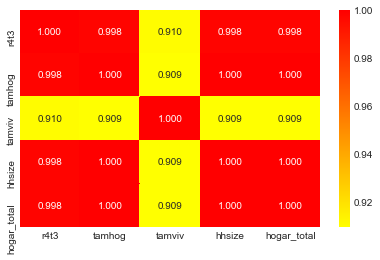

In [23]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs()>0.9, corr_matrix['tamhog'].abs()>0.9],
           annot = True, cmap = plt.cm.autumn_r,fmt='.3f')

In [24]:
heads = heads.drop(['r4t3','tamhog','hogar_total'],axis=1)

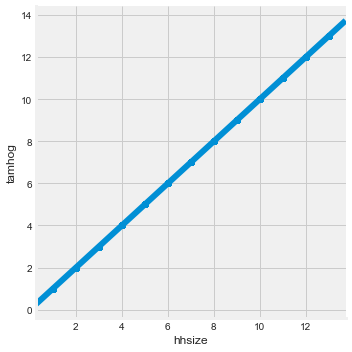

In [25]:
sns.lmplot('hhsize','tamhog',data)

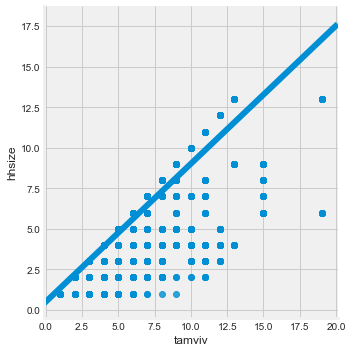

In [26]:
sns.lmplot('tamviv','hhsize',data)

In [27]:
corr_matrix.loc[corr_matrix['coopele'].abs()>0.9, corr_matrix['coopele'].abs()>0.9]

public   coopele
public   1.000000 -0.967759
coopele -0.967759  1.000000

In [28]:
corr_matrix.loc[corr_matrix['area2'].abs()>0.9, corr_matrix['area2'].abs()>0.9]
#rural vs urban 인데, urban아님rural이기때문에 하나는 없애준다

area1  area2
area1    1.0   -1.0
area2   -1.0    1.0

In [29]:
heads=heads.drop(['area2'],axis=1)

#### make dummy to ordinal
왜? dummy인데 의미가 있음 ex) bad-regular-good은 0,1,2 척도로 나타내면 굳

In [30]:
heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]),
                           axis = 1)  #3개중 제일 큰 곳의 위치를 반환(1인곳.column기준)

heads = heads.drop(columns = ['epared1', 'epared2', 'epared3'])

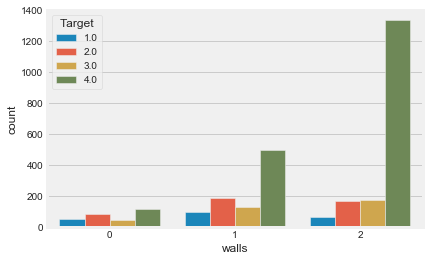

In [31]:
sns.countplot(x='walls',data=heads,hue='Target')

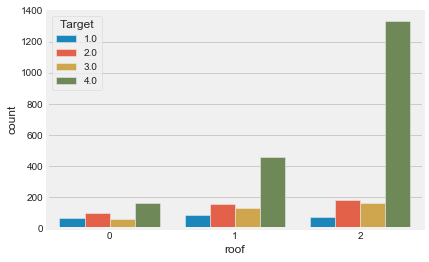

In [32]:
heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]),
                           axis = 1)
heads = heads.drop(columns = ['etecho1', 'etecho2', 'etecho3'])
sns.countplot(x='roof',data=heads,hue='Target')

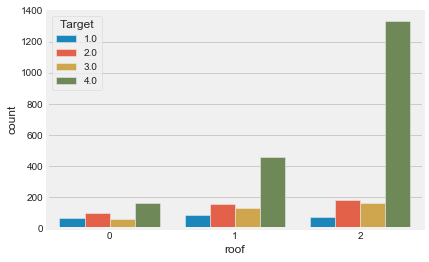

In [33]:
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]),
                           axis = 1)
heads = heads.drop(columns = ['eviv1', 'eviv2', 'eviv3'])
sns.countplot(x='roof',data=heads,hue='Target')

<Figure size 432x288 with 0 Axes>

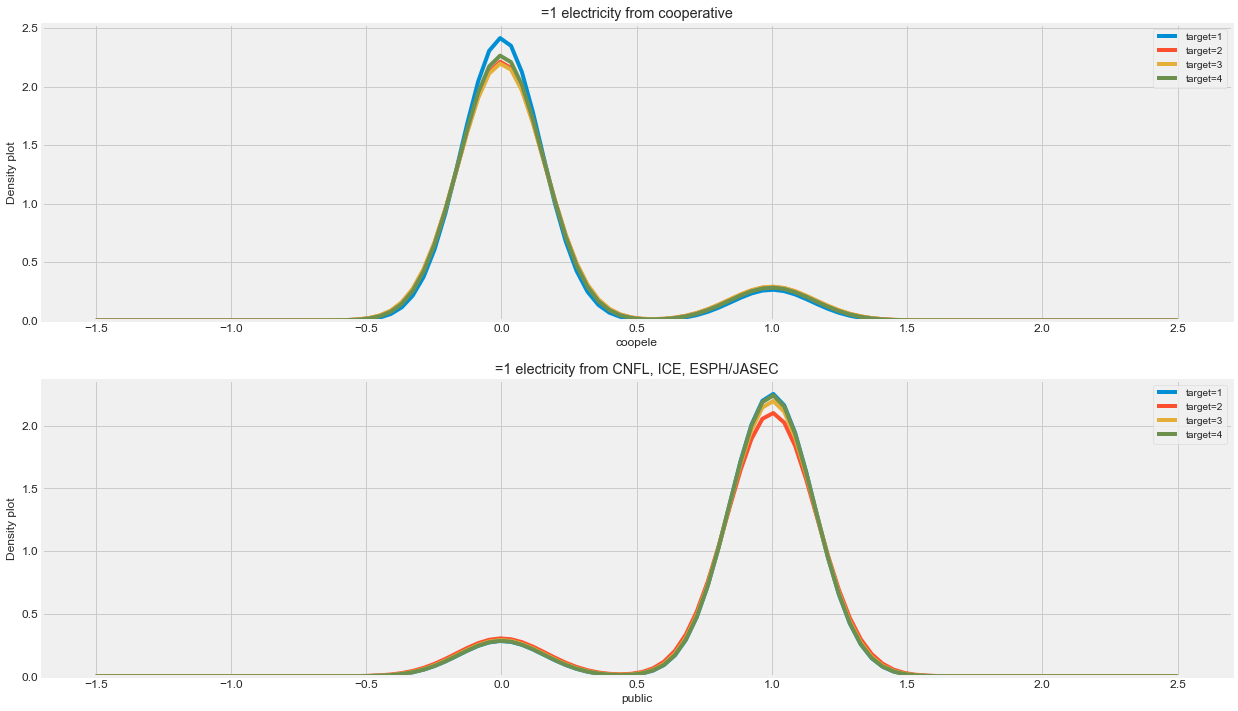

In [34]:
var = ['coopele','public']
t1= train.loc[train['Target']==1]
t2=train.loc[train['Target']==2]
t3=train.loc[train['Target']==3]
t4=train.loc[train['Target']==4]

plt.figure()
fig, axs = plt.subplots(2,1,figsize=(19,12))
i=0
for feature in var:
    i+=1
    plt.subplot(2,1,i)
    sns.kdeplot(t1[feature], bw=.5, label="target=1")
    sns.kdeplot(t2[feature], bw=.5, label="target=2") #bandwidth가중요
    sns.kdeplot(t3[feature], bw=.5, label="target=3")
    sns.kdeplot(t4[feature], bw=.5, label="target=4") #bandwidth가중요
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.title(code.loc[code['name']==feature].iloc[0,1])
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

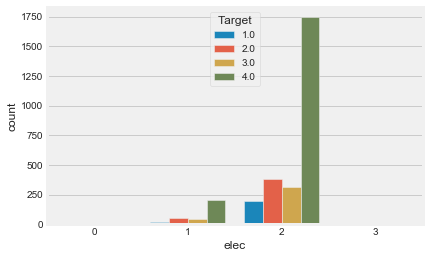

In [35]:
heads['elec'] = np.argmax(np.array(heads[['noelec','coopele','public','planpri']]),
                           axis = 1)
heads = heads.drop(columns = ['noelec','coopele','public','planpri'])
sns.countplot(x='elec',data=heads,hue='Target')

#### + Feature Construction (비슷한 내용을 묶어서 더 강력한 설명변수 만들기)
상관관계를 더 키우기 위해, 새로 만든 세개 feature를 합칠수도 있다.

In [36]:
#1. 평판columns 합쳐서
heads['walls+roof+floor'] = heads['walls']+heads['roof']+heads['floor']  #df column끼리 더하면 더해짐

In [37]:
pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(normalize=True)).rename(columns={'Target':'Normalized Count'}).reset_index()

walls+roof+floor  Target  Normalized Count
0                  0     4.0          0.376404
1                  0     2.0          0.320225
2                  0     1.0          0.162921
3                  0     3.0          0.140449
4                  1     4.0          0.323529
5                  1     2.0          0.264706
6                  1     1.0          0.220588
7                  1     3.0          0.191176
8                  2     4.0          0.409449
9                  2     2.0          0.220472
10                 2     1.0          0.196850
11                 2     3.0          0.173228
12                 3     4.0          0.496269
13                 3     2.0          0.229478
14                 3     3.0          0.149254
15                 3     1.0          0.125000
16                 4     4.0          0.620805
17                 4     2.0          0.177852
18                 4     3.0          0.147651
19                 4     1.0          0.053691
20                 5     4.0          0.650602
21                 5     2.0          0.138554
22                 5     3.0          0.135542
23                 5     1.0          0.075301
24                 6     4.0          0.799163
25                 6     3.0          0.087866
26                 6     2.0          0.081590
27                 6     1.0          0.031381

In [38]:
# 2. No toilet, no electricity, no floor, no water service, no ceiling
heads['warning'] = 1 * (heads['sanitario1'] + 
                         (heads['elec'] == 0) + 
                         heads['pisonotiene'] + 
                         heads['abastaguano'] + 
                         (heads['cielorazo'] == 0))
heads['warning'].head()

0    0
1    0
2    0
5    0
8    0
Name: warning, dtype: int64

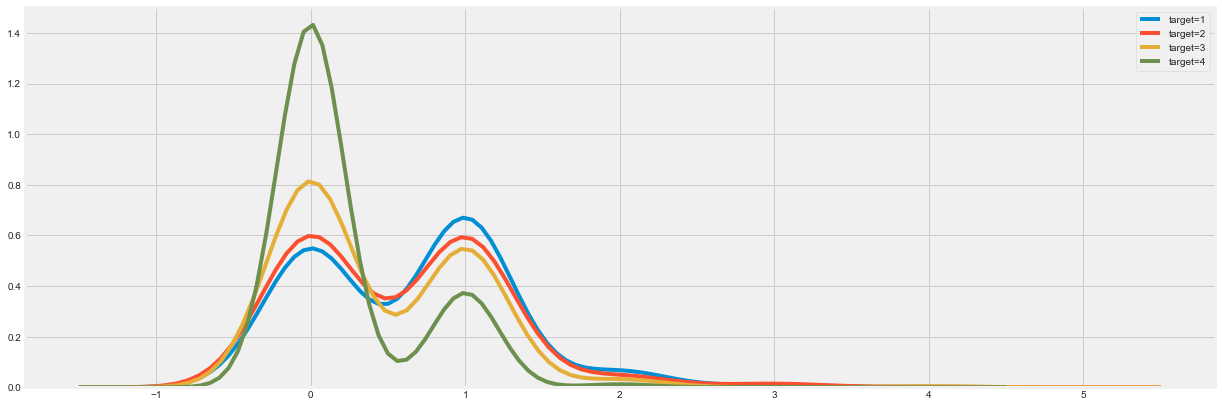

In [39]:
plt.figure(figsize=(19,7))
t1= heads.loc[heads['Target']==1]
t2=heads.loc[heads['Target']==2]
t3=heads.loc[heads['Target']==3]
t4=heads.loc[heads['Target']==4]

sns.kdeplot(t1['warning'], bw=.5, label="target=1")
sns.kdeplot(t2['warning'], bw=.5, label="target=2") #bandwidth가중요
sns.kdeplot(t3['warning'], bw=.5, label="target=3")
sns.kdeplot(t4['warning'], bw=.5, label="target=4") #bandwidth가중요

In [40]:
# 3.  Owns a refrigerator, computer, tablet, and television
heads['bonus'] = 1 * (heads['refrig'] + 
                         heads['computer'] + 
                         heads['television'] ) #qmobilephone은 양적 category라 뺐다
heads['bonus'].head()

0    1
1    1
2    1
5    1
8    1
Name: bonus, dtype: int64

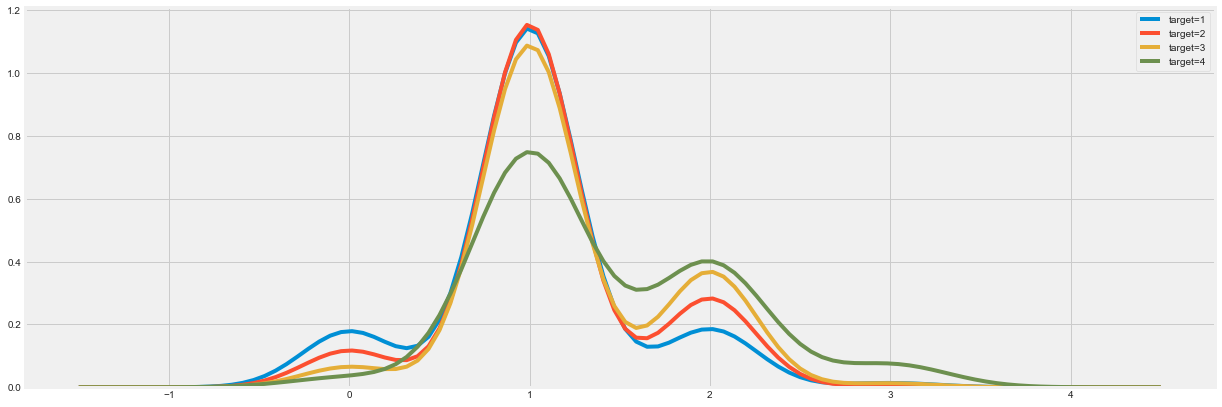

In [41]:
plt.figure(figsize=(19,7))
t1= heads.loc[heads['Target']==1]
t2=heads.loc[heads['Target']==2]
t3=heads.loc[heads['Target']==3]
t4=heads.loc[heads['Target']==4]

sns.kdeplot(t1['bonus'], bw=.5, label="target=1")
sns.kdeplot(t2['bonus'], bw=.5, label="target=2") #bandwidth가중요
sns.kdeplot(t3['bonus'], bw=.5, label="target=3")
sns.kdeplot(t4['bonus'], bw=.5, label="target=4") #bandwidth가중요

In [42]:
#4. per capita
heads['phones-per-capita']=heads['qmobilephone']/heads['tamviv']
heads['rooms-per-capita']=heads['rooms']/heads['tamviv']

#### Measuring correlations

In [45]:
train_heads = heads.loc[heads['Target'].notnull(),:].copy()
s=train_heads.corr()['Target'].sort_values() #전체 corr한 matrix에서 target column만 떼어온다
corr = pd.DataFrame(s).rename(columns={'Target':'corr'}).reset_index()
corr = corr.rename(columns={'index':'feature'})
print(corr.head())
print(corr.dropna().tail(10))

        feature      corr
0       warning -0.302588
1     hogar_nin -0.266309
2          r4t1 -0.260917
3  overcrowding -0.234954
4          r4m1 -0.209479
              feature      corr
75        paredblolad  0.254469
76         pisomoscer  0.275452
77               roof  0.278540
78          cielorazo  0.295249
79              walls  0.298737
80  phones-per-capita  0.299026
81              floor  0.307605
82   walls+roof+floor  0.332446
83           meaneduc  0.333750
84             Target  1.000000


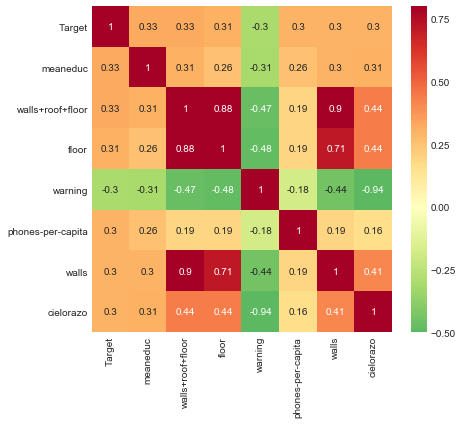

In [46]:
variables = ['Target','meaneduc','walls+roof+floor','floor','warning','phones-per-capita','walls','cielorazo']

corr_mat = train_heads[variables].corr().round(2)

plt.figure(figsize = (6,6))
sns.heatmap(corr_mat, vmin = -0.5, vmax = 0.8, center = 0,
           cmap = plt.cm.RdYlGn_r, annot=True)

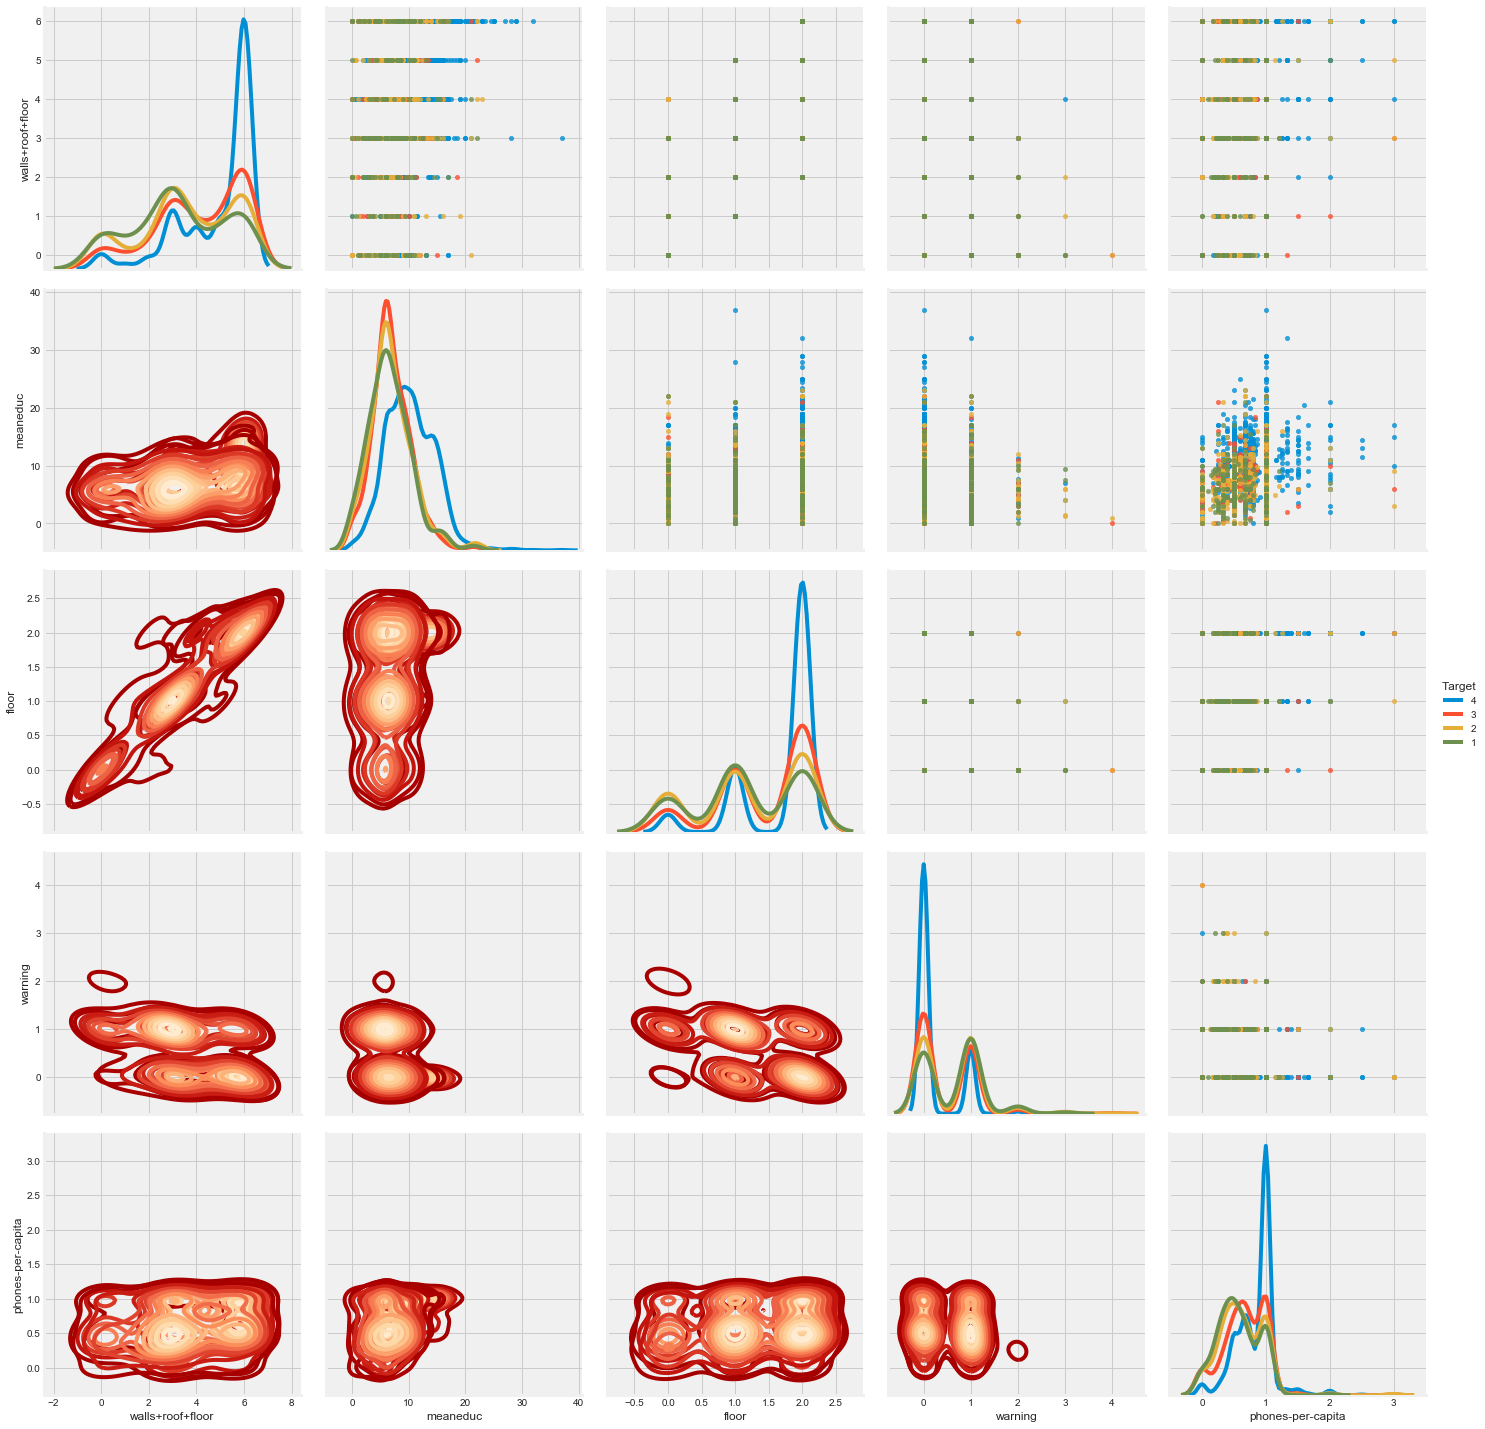

In [48]:
# 가장연관된 5개
plot_data = train_heads[['Target','walls+roof+floor','meaneduc','floor','warning','phones-per-capita']]

grid = sns.PairGrid(data = plot_data, height=4, diag_sharey =False,
                   hue='Target',hue_order=[4,3,2,1],
                   vars=[x for x in list(plot_data.columns) if x!='Target'])

grid.map_upper(plt.scatter,alpha=0.8,s=20) #alpha=투명도

grid.map_diag(sns.kdeplot)

grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r) #밀도함수
grid = grid.add_legend()

In [49]:
household_feats = list(heads.columns)

### b) individual Level  Variables

In [50]:
ind = data[id_ + ind_bool + ind_ordered]
ind.shape

(33413, 38)

In [51]:
corr_matrix = ind.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(abs(upper[column])>0.95)]
to_drop

['female']

In [52]:
corr_matrix.loc[corr_matrix['female'].abs()>0.9, corr_matrix['female'].abs()>0.9]

male  female
male     1.0    -1.0
female  -1.0     1.0

In [53]:
ind = ind.drop(columns = 'male')

#### Create new features

In [54]:
ind[[c for c in ind if c.startswith('instl')]].head() #amount of instruction

instlevel1  instlevel2  instlevel3  instlevel4  instlevel5  instlevel6  \
0           0           0           0           1           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           1           0   
3           0           0           0           1           0           0   
4           0           0           0           0           1           0   

   instlevel7  instlevel8  instlevel9  
0           0           0           0  
1           0           1           0  
2           0           0           0  
3           0           0           0  
4           0           0           0

In [55]:
ind['inst']=np.argmax(np.array(ind[[c for c in ind if c.startswith('instl')]]),axis=1)

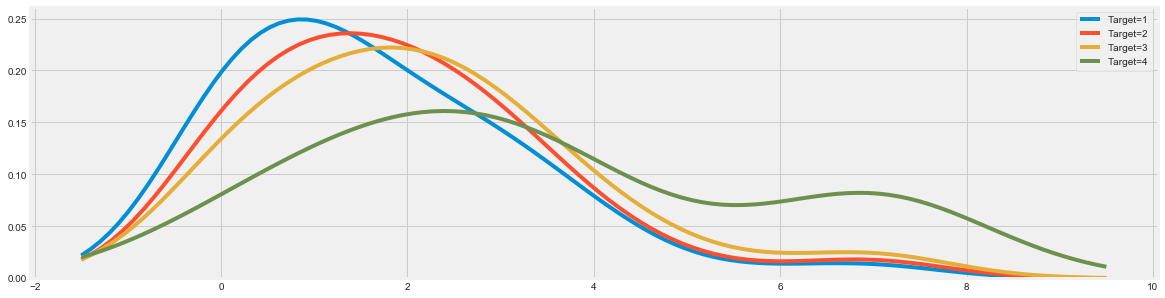

In [56]:
plt.figure(figsize=(18,5))
t1 = ind[ind['Target']==1]
t2 = ind[ind['Target']==2]
t3 = ind[ind['Target']==3]
t4 = ind[ind['Target']==4]

sns.kdeplot(t1['inst'], bw=.5,label="Target=1")
sns.kdeplot(t2['inst'],bw=.5,label="Target=2")
sns.kdeplot(t3['inst'],bw=.5,label="Target=3")
sns.kdeplot(t4['inst'],bw=.5,label="Target=4")

In [57]:
ind=ind.drop([c for c in ind if c.startswith('instl')],axis=1)

In [58]:
ind['tech']=ind['v18q']+ind['mobilephone']

### 3. aggregation
individual 을 household(idhogar) 단위로 합친다 - 평균

In [60]:
ind_agg = ind.drop(columns='Target').groupby('idhogar').agg(['mean'])
ind_agg.columns = ind_agg.columns.droplevel(1)
ind_agg.head()

v18q  dis    female  estadocivil1  estadocivil2  estadocivil3  \
idhogar                                                                    
000a08204     1  0.0  0.333333      0.333333      0.666667           0.0   
000bce7c4     0  0.5  0.500000      0.000000      0.000000           1.0   
001845fb0     0  0.0  0.500000      0.000000      0.500000           0.0   
001ff74ca     1  0.0  1.000000      0.500000      0.000000           0.0   
003123ec2     0  0.0  0.250000      0.500000      0.500000           0.0   

           estadocivil4  estadocivil5  estadocivil6  estadocivil7  ...   \
idhogar                                                            ...    
000a08204           0.0           0.0           0.0           0.0  ...    
000bce7c4           0.0           0.0           0.0           0.0  ...    
001845fb0           0.0           0.0           0.0           0.5  ...    
001ff74ca           0.0           0.5           0.0           0.0  ...    
003123ec2           0.0           0.0           0.0           0.0  ...    

           parentesco8  parentesco9  parentesco10  parentesco11  parentesco12  \
idhogar                                                                         
000a08204          0.0          0.0           0.0           0.0           0.0   
000bce7c4          0.0          0.0           0.0           0.0           0.0   
001845fb0          0.0          0.0           0.0           0.0           0.0   
001ff74ca          0.0          0.0           0.0           0.0           0.0   
003123ec2          0.0          0.0           0.0           0.0           0.0   

           mobilephone   escolari        age      inst  tech  
idhogar                                                       
000a08204            1   8.666667  20.666667  4.666667     2  
000bce7c4            1   2.500000  61.500000  0.500000     1  
001845fb0            1  10.250000  35.500000  4.000000     1  
001ff74ca            1   8.000000  19.000000  3.500000     2  
003123ec2            1   3.250000  12.750000  1.250000     1  

[5 rows x 27 columns]

In [62]:
final = heads.merge(ind_agg, on='idhogar',how='left')
final.shape

(10307, 115)

In [63]:
final.head()

Id    idhogar  Target  hacdor  hacapo  v14a  refrig  paredblolad  \
0  ID_279628684  21eb7fcc1     4.0       0       0     1       1            1   
1  ID_f29eb3ddd  0e5d7a658     4.0       0       0     1       1            0   
2  ID_68de51c94  2c7317ea8     4.0       0       0     1       1            0   
3  ID_ec05b1a7b  2b58d945f     4.0       0       0     1       1            1   
4  ID_1284f8aad  d6dae86b7     4.0       1       0     1       1            1   

   paredzocalo  paredpreb  ...   parentesco8  parentesco9  parentesco10  \
0            0          0  ...           0.0          0.0           0.0   
1            0          0  ...           0.0          0.0           0.0   
2            0          0  ...           0.0          0.0           0.0   
3            0          0  ...           0.0          0.0           0.0   
4            0          0  ...           0.0          0.0           0.0   

   parentesco11  parentesco12  mobilephone  escolari   age  inst  tech  
0           0.0           0.0            1     10.00  43.0   3.0     1  
1           0.0           0.0            1     12.00  67.0   7.0     2  
2           0.0           0.0            0     11.00  92.0   4.0     0  
3           0.0           0.0            1      8.25  25.0   3.0     2  
4           0.0           0.0            1      5.75  19.0   2.0     1  

[5 rows x 115 columns]

## 3. Modeling

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro') #가장좋은게 0.5

In [66]:
train_labels = np.array(list(final[final['Target'].notnull()]['Target'].astype(np.uint8))) #targets

train_set = final[final['Target'].notnull()].drop(['Id','idhogar','Target'],axis=1)
test_set = final[final['Target'].isnull()].drop(['Id','idhogar','Target'],axis=1)

ids = test[['Id','idhogar']].copy()

### normalization

In [67]:
features = list(train_set.columns)

pipeline = Pipeline([('imputer',Imputer(strategy='median')),
                    ('scaler',MinMaxScaler())])

train_set = pipeline.fit_transform(train_set)
test_set= pipeline.fit_transform(test_set)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


### Choose which model to use

In [75]:
#Linear Support Vector Classifier
from sklearn.svm import LinearSVC

scores = cross_val_score(LinearSVC(), train_set, train_labels, cv = 10, scoring=scorer, n_jobs=-1)
print(round(scores.mean(),3))

0.259


In [76]:
#MLP classifer
from sklearn.neural_network import MLPClassifier

scores = cross_val_score(MLPClassifier(), train_set, train_labels, cv = 10, scoring=scorer, n_jobs=-1)
print(round(scores.mean(),3))

0.279


In [77]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

scores = cross_val_score(LinearDiscriminantAnalysis(), train_set, train_labels, cv = 10, scoring=scorer, n_jobs=-1)
print(round(scores.mean(),3))

0.29


In [79]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

for n in [5, 10, 20]:
    print('KNN : {}'.format(n))
    scores = cross_val_score(KNeighborsClassifier(n_neighbors = n), train_set, train_labels, cv = 10, scoring=scorer, n_jobs=-1)
    print(round(scores.mean(),3))

KNN : 5
0.275
KNN : 10
0.262
KNN : 20
0.241


In [80]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(100, random_state=10), train_set, train_labels, cv = 10, scoring=scorer, n_jobs=-1)
print(round(scores.mean(),3))

0.345


**random_forest 선택**

### Feature Selection
recursive feature elimination(RFECV) 사용 - stepwise: feature 삭제 후 스코어 확인(cv score 안늘어날때까지)

In [92]:
from sklearn.feature_selection import RFECV

estimator = RandomForestClassifier(random_state = 10, n_estimators = 100,  n_jobs = -1) 
selector = RFECV(estimator, step = 1, cv = 10, scoring= scorer, n_jobs = -1)

In [93]:
selector.fit(train_set, train_labels)

RFECV(cv=10,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=-1,
   scoring=make_scorer(f1_score, average=macro), step=1, verbose=0)

13

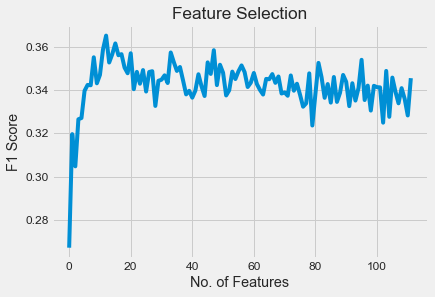

In [94]:
plt.plot(selector.grid_scores_);
plt.xlabel('No. of Features'); 
plt.ylabel('F1 Score'); 
plt.title('Feature Selection');
selector.n_features_

In [95]:
selector.grid_scores_

array([0.26709173, 0.31959165, 0.30470692, 0.32646183, 0.32705203,
       0.3396177 , 0.34234425, 0.34218268, 0.35510876, 0.3430823 ,
       0.34697804, 0.35879673, 0.36512914, 0.35269134, 0.35652411,
       0.36152377, 0.35606599, 0.35655539, 0.3503504 , 0.34773134,
       0.35696448, 0.34035692, 0.34838286, 0.34288739, 0.34919969,
       0.3392869 , 0.34832215, 0.34868289, 0.3326288 , 0.34425346,
       0.34472994, 0.34676977, 0.34321922, 0.35734112, 0.35286408,
       0.34882028, 0.35061651, 0.34442875, 0.33797296, 0.33962991,
       0.33644295, 0.3397039 , 0.34727689, 0.34172882, 0.33720873,
       0.35276131, 0.34741502, 0.35838386, 0.3422559 , 0.35167727,
       0.34799043, 0.33747313, 0.33986395, 0.34849272, 0.34505833,
       0.34864077, 0.35135137, 0.3482678 , 0.34137818, 0.3433504 ,
       0.34787101, 0.34270503, 0.34000649, 0.33789084, 0.34511758,
       0.34496675, 0.34734092, 0.34329919, 0.34623844, 0.33837251,
       0.33887839, 0.33733667, 0.34671377, 0.33966163, 0.34289

In [96]:
rankings = pd.DataFrame({'feature': list(train_set.columns), 'rank': list(selector.ranking_)}).sort_values('rank')
rankings.head(10)

feature  rank
55          dependency     1
110               inst     1
80    walls+roof+floor     1
83   phones-per-capita     1
87              female     1
60               rooms     1
59        overcrowding     1
84    rooms-per-capita     1
94        estadocivil7     1
109                age     1

In [97]:
train_selected = selector.transform(train_set)
test_selected = selector.transform(test_set)

In [98]:
# Convert back to dataframe
selected_features = train_set.columns[np.where(selector.ranking_==1)]
train_selected = pd.DataFrame(train_selected, columns = selected_features)
test_selected = pd.DataFrame(test_selected, columns = selected_features)

In [99]:
scores = cross_val_score(RandomForestClassifier(100, random_state=10), train_selected, train_labels, cv = 10, scoring=scorer, n_jobs=-1)
print(round(scores.mean(),3))

0.365


### Gradient Boosting Machine
lightgbm - random hyp

In [102]:
test_ids = list(final.loc[final['Target'].isnull(), 'idhogar'])

In [103]:
def macro_f1_score(labels, predictions):
    predictions = predictions.reshape(len(np.unique(labels)), -1 ).argmax(axis = 0)
    metric_value = f1_score(labels, predictions, average = 'macro')
    return 'macro_f1', metric_value, True

In [276]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb

def model_gbm(train, train_labels, test, test_ids, nfolds = 5, hyp = None):
    
    feature_names = list(train.columns)

    if hyp is not None:
        params = hyp
    else:
        params = {'boosting_type': 'dart', 
                  'colsample_bytree': 0.88, 
                  'learning_rate': 0.028, 
                   'min_child_samples': 10, 
                   'num_leaves': 36, 'reg_alpha': 0.76, 
                   'reg_lambda': 0.43, 
                   'subsample_for_bin': 40000, 
                   'subsample': 0.54, 
                   'class_weight': 'balanced',
                 'n_estimators': 10000}
    
    model = lgb.LGBMClassifier(**params, objective = 'multiclass', n_jobs = -1, random_state = 10)
    
    strkfold = StratifiedKFold(n_splits = nfolds, shuffle = True)
    
    # prediction 넣을 df 생성
    predictions = pd.DataFrame()
    importances = np.zeros(len(feature_names))
    
    train = np.array(train)
    test = np.array(test)
    train_labels = np.array(train_labels).reshape((-1 ))
    
    valid_scores = []
    
    for i, (train_indices, valid_indices) in enumerate(strkfold.split(train, train_labels)):
        
        fold_predictions = pd.DataFrame()
        
        X_train = train[train_indices]
        X_valid = train[valid_indices]
        y_train = train_labels[train_indices]
        y_valid = train_labels[valid_indices]
        
        model.fit(X_train, y_train, early_stopping_rounds = 100, 
                  eval_metric = macro_f1_score,
                  eval_set = [(X_train, y_train), (X_valid, y_valid)],
                  eval_names = ['train', 'valid'],
                  verbose = 0)
        
        valid_scores.append(model.best_score_['valid']['macro_f1'])
        
        fold_prob = model.predict_proba(test)
        
        for j in range(4):
            fold_predictions[(j + 1)] = fold_prob[:, j]
            
        fold_predictions['idhogar'] = test_ids
        fold_predictions['fold'] = (i+1)
        
        predictions = predictions.append(fold_predictions)
        
        importances += model.feature_importances_ / nfolds   
        
        print('Fold {}, Valid Score: {}'.format(i+1, round(valid_scores[i], 5)))

    feat_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
    
    valid_scores = np.array(valid_scores)
    print('{} cross validation score: {} with std: {}'.format(nfolds, round(valid_scores.mean(), 5), round(valid_scores.std(), 5)))
    
    predictions = predictions.groupby('idhogar', as_index = False).mean()
    
    predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
    predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
    predictions = predictions.drop(columns = ['fold'])
    
    submission = ids.merge(predictions[['idhogar', 'Target']], on = 'idhogar', how = 'left').drop(columns = ['idhogar'])
        
    # NA값해결 - head없는것들 :어차피 test에서는 count안하니깐 4로 fill in 해줌
    submission['Target'] = submission['Target'].fillna(4)
    
    return submission, feat_importances, valid_scores

In [277]:
import warnings
warnings.filterwarnings(action='ignore')

submission, feat_imp, valid_scores = model_gbm(train_set, train_labels, test_set, test_ids)

Fold 1, Valid Score: 0.33569
Fold 2, Valid Score: 0.43425
Fold 3, Valid Score: 0.39654
Fold 4, Valid Score: 0.41009
Fold 5, Valid Score: 0.36026
5 cross validation score: 0.38737 with std: 0.03523


In [114]:
feat_imp.sort_values(by='importance', ascending=False).head(10)

feature  importance
109                age    191537.6
58            meaneduc    102077.4
108           escolari    100696.2
110               inst     78907.4
84    rooms-per-capita     71544.2
83   phones-per-capita     45802.6
56              edjefe     43036.4
87              female     36382.8
59        overcrowding     36052.0
60               rooms     35676.0

try selected features

In [115]:
warnings.filterwarnings(action='ignore')

submission_sel, feat_imp_sel, valid_scores_sel = model_gbm(train_selected, train_labels, test_selected, test_ids)

Fold 1, Valid Score: 0.37035
Fold 2, Valid Score: 0.37316
Fold 3, Valid Score: 0.40606
Fold 4, Valid Score: 0.42324
Fold 5, Valid Score: 0.37438


'5 cross validation score: 0.38944 with std: 0.02133.'

## 4. Hyperparameter tuning
using Hyperopt

In [124]:
from hyperopt import hp, tpe, Trials, fmin, STATUS_OK

In [199]:
def objective(hyperparameters, nfolds=5):
    for parameter_name in ['max_depth', 'num_leaves', 'subsample_for_bin', 'min_child_samples', 'subsample_freq']:
        hyperparameters[parameter_name] = int(hyperparameters[parameter_name])

    
    strkfold = StratifiedKFold(n_splits = nfolds, shuffle = True)
    
    train = np.array(train_set)
    labels = np.array(train_labels).reshape((-1 ))
    
    valid_scores = []
    best_estimators = []
    
    model = lgb.LGBMClassifier(**hyperparameters, class_weight = 'balanced',
                               n_jobs=-1, objective = 'multiclass') #early stopping할 예정

    for i, (train_indices, valid_indices) in enumerate(strkfold.split(train, labels)):
        
        X_train = train[train_indices]
        X_valid = train[valid_indices]
        y_train = labels[train_indices]
        y_valid = labels[valid_indices]
        
        model.fit(X_train, y_train, early_stopping_rounds = 100, 
                  eval_metric = macro_f1_score, 
                  eval_set = [(X_train, y_train), (X_valid, y_valid)],
                  eval_names = ['train', 'valid'],
                  verbose = 0)

        valid_scores.append(model.best_score_['valid']['macro_f1'])
        
        best_estimators.append(model.best_iteration_)
    
    score = np.mean(valid_scores)
    score_std = np.std(valid_scores)
    loss = 1 - score #hyperopt는 minimize시키는 것 이기 때문에 1-score해준다
    
    estimators = int(np.mean(best_estimators))
    hyperparameters['n_estimators'] = estimators
    
    param_score.append([loss, hyperparameters, score, score_std])
    
    return {'loss': loss, 'hyperparameters': hyperparameters, 'status': STATUS_OK, 
            'score': score, 'score_std': score_std}

In [222]:
space = {
    'boosting_type': 'gbdt', 
    'subsample': hp.uniform('subsample', 0.5, 0.8),
    'subsample_freq': hp.quniform('subsample_freq', 1, 10, 1),
    'max_depth': hp.quniform('max_depth', 1, 40, 1),
    'num_leaves': hp.quniform('num_leaves', 20, 50, 1),
    'learning_rate': hp.quniform('learning_rate', 0.001, 0.005, 0.0005),
    'subsample_for_bin': hp.quniform('subsample_for_bin', 20000, 80000, 5000),
    'min_child_samples': hp.quniform('min_child_samples', 5, 30, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0.3, 0.9),
    'reg_lambda': hp.uniform('reg_lambda', 0.3, 0.9),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.7, 1.0),
    'n_estimators':10000
}

In [223]:
trials = Trials()
param_score = []

best = fmin(fn = objective, space = space, algo = tpe.suggest, trials = trials, max_evals = 100)

100%|██████████████████████████████████████████████| 100/100 [25:31<00:00, 17.31s/trial, best loss: 0.5537729387587849]


In [224]:
results = pd.DataFrame(param_score)
results.columns=['loss','hyperparameters','score','std']
results=results.sort_values('score', ascending = False)
results.head()

loss                                    hyperparameters     score  \
85  0.553773  {'boosting_type': 'gbdt', 'colsample_bytree': ...  0.446227   
63  0.554198  {'boosting_type': 'gbdt', 'colsample_bytree': ...  0.445802   
66  0.554327  {'boosting_type': 'gbdt', 'colsample_bytree': ...  0.445673   
43  0.556405  {'boosting_type': 'gbdt', 'colsample_bytree': ...  0.443595   
93  0.556711  {'boosting_type': 'gbdt', 'colsample_bytree': ...  0.443289   

         std  
85  0.019272  
63  0.011394  
66  0.024496  
43  0.017078  
93  0.008313

In [225]:
results.iloc[0,1]

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.8603750431958315,
 'learning_rate': 0.0012000000000000001,
 'max_depth': 30,
 'min_child_samples': 10,
 'n_estimators': 74,
 'num_leaves': 24,
 'reg_alpha': 0.8964299539595975,
 'reg_lambda': 0.8458843161841162,
 'subsample': 0.5455191559069142,
 'subsample_for_bin': 55000,
 'subsample_freq': 5}

### Apply hyperparameters

In [234]:
hyp = {'boosting_type': 'gbdt',
 'colsample_bytree': 0.8603750431958315,
 'learning_rate': 0.0012000000000000001,
 'max_depth': 30,
 'min_child_samples': 10,
 'n_estimators': 74,
 'num_leaves': 24,
 'reg_alpha': 0.8964299539595975,
 'reg_lambda': 0.8458843161841162,
 'subsample': 0.5455191559069142,
 'subsample_for_bin': 55000,
 'subsample_freq': 5}

In [241]:
submission, feat_imp, valid_scores = model_gbm(train_set, train_labels, 
                                             test_set, test_ids, 
                                             nfolds = 5, hyp=hyp)

Fold 1, Valid Score: 0.43294
Fold 2, Valid Score: 0.44207
Fold 3, Valid Score: 0.40681
Fold 4, Valid Score: 0.43414
Fold 5, Valid Score: 0.39594
5 cross validation score: 0.42238 with std: 0.01777


In [242]:
valid_scores

array([0.43294105, 0.44207458, 0.40680904, 0.43414008, 0.39594257])

In [237]:
submission, feat_imp, valid_scores = model_gbm(train_selected, train_labels, 
                                             test_selected, test_ids, 
                                             nfolds = 5, hyp=hyp)

Fold 1, Valid Score: 0.43881
Fold 2, Valid Score: 0.41255
Fold 3, Valid Score: 0.40223
Fold 4, Valid Score: 0.41321
Fold 5, Valid Score: 0.42159
5 cross validation score: 0.41768 with std: 0.01222


In [155]:
valid_scores

array([0.41657082, 0.40167177, 0.3835936 , 0.41234277, 0.35480584,
       0.34870231, 0.38211676, 0.34190268, 0.37367691, 0.39085498])

In [243]:
submission.to_csv('submission.csv', index = False)

In [244]:
feat_imp.sort_values(by='importance',ascending=False).head(10)

feature  importance
109                age       595.0
108           escolari       480.0
58            meaneduc       335.4
110               inst       329.6
84    rooms-per-capita       282.4
83   phones-per-capita       262.4
55          dependency       262.2
80    walls+roof+floor       237.4
94        estadocivil7       180.2
56              edjefe       173.6

## 5. Dimension Reduction (PCA)

In [245]:
from sklearn.decomposition import PCA

In [246]:
n_components = 3 #주성분 3개. (map down to 3 dimensions)

pca = PCA(n_components=n_components)

In [284]:
train_p = final[final['Target'].notnull()].drop(['Id','idhogar','Target'],axis=1)
test_p = final[final['Target'].isnull()].drop(['Id','idhogar','Target'],axis=1)
features=train_p.columns

In [285]:
features = list(train_p.columns)

pipeline = Pipeline([('imputer',Imputer(strategy='median')),
                    ('scaler',MinMaxScaler())])

train_p = pipeline.fit_transform(train_p)
test_p= pipeline.fit_transform(test_p)

In [286]:
train_p = pd.DataFrame(train_p)
test_p = pd.DataFrame(test_p)
train_p.columns = features
test_p.columns = features

In [288]:
reduction = pca.fit_transform(train_p) # reduction하는 method를 fit 시키고
test_reduction = pca.transform(test_p) # fit시킨 method를 test에 apply

test_p['pca_c1'] = test_reduction[:, 0]
test_p['pca_c2'] = test_reduction[:, 1]
test_p['pca_c3'] = test_reduction[:, 2]

train_p['pca_c1'] = reduction[:, 0]
train_p['pca_c2'] = reduction[:, 1]
train_p['pca_c3'] = reduction[:, 2]        

In [289]:
train_p.columns

Index(['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo',
       'paredpreb', 'pisocemento', 'pareddes', 'paredmad',
       ...
       'parentesco11', 'parentesco12', 'mobilephone', 'escolari', 'age',
       'inst', 'tech', 'pca_c1', 'pca_c2', 'pca_c3'],
      dtype='object', length=115)

In [290]:
train_labels

array([4, 4, 4, ..., 4, 2, 2])

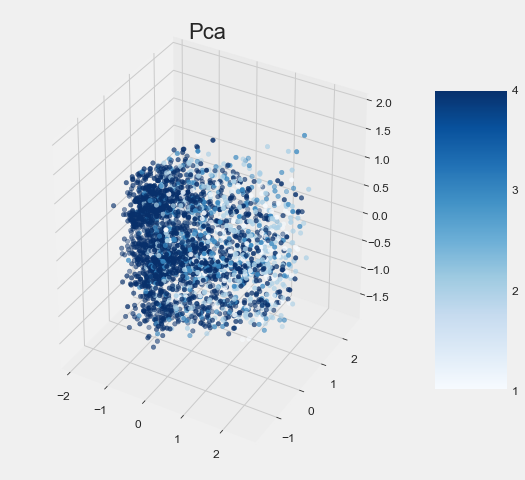

In [291]:
#visualize
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='3d')
    
p = ax.scatter(train_df['pca_c1'], train_df['pca_c2' ], train_df['pca_c3'], 
                   c = train_labels, cmap=plt.cm.Blues)
    
plt.title(f'{name.capitalize()}', size = 22)
fig.colorbar(p, aspect = 4, ticks = [1, 2, 3, 4])